<h2>Data Prep</h2>

Some of this survey prep exists in a separate file so the code driven redactions
will not be shown here.  Ideally this file would start with a read of the file output from the 
transformations done elsewhere.


In [ ]:
%matplotlib inline
import sys
import matplotlib
import pandas as pd

in_file = 'e:\\lexingtonsurvey\\town services and housing costs.csv'
df = pd.read_csv(in_file, encoding='utf-8')

# Note: three fields had trailing spaces
rename_dict = \
{'In the past 12 months, has any household member done the following? (Check all that apply) [Visited the Community Center]':'ActivityComCenter',
'In the past 12 months, has any household member done the following? (Check all that apply) [Used town swimming facilities]':'ActivitySwim',
'In the past 12 months, has any household member done the following? (Check all that apply) [Used town recreational fields or courts]':'ActivityField',
'In the past 12 months, has any household member done the following? (Check all that apply) [Used a school or neighborhood playground]':'ActivityPlayground',
'In the past 12 months, has any household member done the following? (Check all that apply) [Used the Minuteman Bikeway]':'ActivityMinutemanBikeway',
'In the past 12 months, has any household member done the following? (Check all that apply) [Visited Lexington conservation areas]':'ActivityConservation',
'In the past 12 months, has any household member done the following? (Check all that apply) [Directly received fire or police services]':'ActivityFirePolice',
'In the past 12 months, has any household member done the following? (Check all that apply) [Attended Lexington public schools]':'ActivityLPS',
'In the past 12 months, has any household member done the following? (Check all that apply) [Participated in any town provided program or service for seniors]':'ActivitySenior',
'In the past 12 months, has any household member done the following? (Check all that apply) [Used Cary library or attended a library event]':'ActivityCary',
'In the past 12 months, has any household member done the following? (Check all that apply) [Served town government in any capacity (employee, committee member, town meeting member, elected representative)]':'ActivityTown',
'Are you aware that the Recreation & Community Programs Department offers financial aid for programs and services?':'RecreationAidAware',
'Has a household member received this type of financial assistance to participate in a program or service? ':'RecreationAidReceive',
'If your primary residence is rental, please indicate your monthly rental cost: ':'MonthlyRent',
'If you own your primary residence, please indicate your total monthly housing payment (mortgage, insurance, property taxes):':'MonthlyHousingCost',
'Do you receive a property tax deferral or property tax credit due to limited income?':'TaxDeferral',
'Does the homeowner own additional properties (vacation home, rental home, condominium, etc.)?':'Unused1',
'What level of stress does your household experience with payment of monthly housing costs?':'Stress',
'Thinking about all the costs of living in your owned property or rental (rent/mortgage, home maintenance, condo fees, property taxes, insurance, utilities), what portion of these costs do you estimate is related to property taxes?':'PropertyTaxShare',
'Are you considering relocating away from Lexington in the next 10 years?':'Relocation',
'Age (respondent)':'Age',
'Size of household (number of people)':'HouseholdSize',
'Disabilities within household (check all that apply)':'Disabilities',
'Length of time living in town (respondent)':'Tenure',
'What type of property is your residence?':'PropertyType',
'Approximate market property value of your Lexington residence (if owned):':'MarketValue',
'Please indicate your approximate household income in the past 12 months':'Income',
'Race/ethnicity (check all that apply)':'Unused2',
'Please indicate how the survey was shared with you (any groups or lists or whether it was forwarded to you.)':'ORShared',
'Please share any comments to the survey team about this survey. Thank you.':'ORComments',
'In the past 12 months, has any household member done the following? (Check all that apply) [Used Lexpress bus]':'ActivityLexpress',
'Are you responsible for the housing costs at your residence (i.e. owner or lessee)?':'Responsible',
'In the past 12 months, has any household member done the following? (Check all that apply) [Used Pine Meadows golf course]':'ActivityGolf',
'Please elaborate or share any additional thoughts. ':'ORAdditional',
}

df.rename(columns=rename_dict, inplace=True)
print df.info()

<h3>Corrections</h3>

In [ ]:

#
# clean up errors
#
# 1. MonthlyHousingCost we don't trust...
# I think this needs to be done before the classification

# 
# we should modify this soon to be two conditions, but lets see how this works
df.loc[(df['MonthlyHousingCost']=='$10,001+') & 
       (df['MarketValue']=='$500,000-$749,999'),'MonthlyHousingCost']='ResponseError'
df.loc[(df['MonthlyHousingCost']=='$10,001+') & 
       (df['MarketValue']=='$750,000-$999,999'),'MonthlyHousingCost']='ResponseError'
df.loc[(df['MonthlyHousingCost']=='$10,001+') & 
       (df['MarketValue']=='Less than $500,000'),'MonthlyHousingCost']='ResponseError'
df.loc[(df['MonthlyHousingCost']=='$10,001+') & 
       (df['MarketValue']=='$1,000,000-$1,249,999'),'MonthlyHousingCost']='ResponseError'
df.loc[(df['MonthlyHousingCost']=='$10,001+') & 
       (df['MarketValue']=='$1,250,000-$1,499,999'),'MonthlyHousingCost']='ResponseError'
df['MonthlyHousingCost'].value_counts()


<H3>Data Driven Transformations</h3>

In [ ]:
transforms = [
    [
    'Tenure', 'TenureStat', None,
{'moved in 1979 and earlier':1975,
'moved in 1980-1989':1985,
'moved in 1990-1999':1995,
'moved in 2000-2009':2005,
'moved in 2010-2014':2012,
'moved in 2015 or later':2017}
    ],
    [
    'Tenure', 'TenureCode', None,
{'moved in 1979 and earlier':1979,
'moved in 1980-1989':1980,
'moved in 1990-1999':1990,
'moved in 2000-2009':2000,
'moved in 2010-2014':2010,
'moved in 2015 or later':2015}
    ],
    ['Stress', 'StressCode', None,
    {'None': 0,
    'Little': 1,
     'Some':2,
    'Significant':3,
    'Substantial':4}
],
    ['Stress', 'StressCode2', None,
    {'None': 0,
    'Little': 0,
     'Some':1,
    'Significant':2,
    'Substantial':2}
],
     ['StressCode2', 'StressBand', None,
    { 0 : '0. Low Stress',
     1 : '1. Medium Stress',
     2 : '2. High Stress'}
],
    ['Stress', 'StressCodeDescriptive', None,
    {'None': '0. None',
    'Little': '1. Little',
     'Some': '2. Some',
    'Significant': '3. Significant',
    'Substantial': '4. Substantial'}
],

    ['MarketValue','MarketValueStat',None,
    {
        '$1,000,000-$1,249,999':1125000,
'$1,250,000-$1,499,999':1375000,
'$1,500,000-$1,749,999':1625000,
'$1,750,000-$1,999,999':1875000,
'$2,000,000 and more':  2500000,
'$500,000-$749,999':625000,
'$750,000-$999,999':875000,
'Less than $500,000':400000,
    }
    ],
    ['MarketValue','MarketValueCode',None,
    {
        '$1,000,000-$1,249,999':1000000,
'$1,250,000-$1,499,999':1250000,
'$1,500,000-$1,749,999':1500000,
'$1,750,000-$1,999,999':1750000,
'$2,000,000 and more':  2000000,
'$500,000-$749,999':500000,
'$750,000-$999,999':750000,
'Less than $500,000':0,
    }
    ],
    ['MarketValue','MarketValueCode1', None,
    {
        '$1,000,000-$1,249,999':1000000,
'$1,250,000-$1,499,999':1250000,
'$1,500,000-$1,749,999':1500000,
'$1,750,000-$1,999,999':1750000,
'$2,000,000 and more':1750000,
'$500,000-$749,999':0,
'$750,000-$999,999':750000,
'Less than $500,000':0,
    }
    ],
    ['Income', 'IncomeStat', None,
     {
         '$100,000-$149,999':125000,
'$150,000-$199,999':175000,
'$200,000 and over':300000,
'$35,000-$49,999':37500,
'$50,000-$74,999':62500,
'$75,000-$99,000':87500,
'Less than $35,000':25000,
     }
    ],
    ['Income', 'IncomeCode', None,
     {
         '$100,000-$149,999':100000,
'$150,000-$199,999':150000,
'$200,000 and over':200000,
'$35,000-$49,999':35000,
'$50,000-$74,999':50000,
'$75,000-$99,000':75000,
'Less than $35,000':0,
     }
    ],
    ['Income', 'IncomeCode1', None,
    {
        '$100,000-$149,999':100000,
'$150,000-$199,999':150000,
'$200,000 and over':200000,
'$35,000-$49,999':0,
'$50,000-$74,999':50000,
'$75,000-$99,000':75000,
'Less than $35,000':0,

    }
    ],
    ['Income', 'IncomeCode2', None,
    {
        '$100,000-$149,999':100000,
'$150,000-$199,999':100000,
'$200,000 and over':200000,
'$35,000-$49,999':0,
'$50,000-$74,999':0,
'$75,000-$99,000':0,
'Less than $35,000':0,

    }
    ],
    ['Age','AgeStat',None,
{    
    '31-39 years':35,
'40-49 years':45,
'50-59 years':55,
'60-69 years':65,
'70-79 years':75,
'80 years and over':85,
'under 30 years':25,
}],
    ['Age','AgeCode',None,
{    
    '31-39 years':30,
'40-49 years':40,
'50-59 years':50,
'60-69 years':60,
'70-79 years':70,
'80 years and over':80,
'under 30 years':0,
}],
    ['Age','AgeCode1',None,
{    
'31-39 years':0,
'40-49 years':40,
'50-59 years':50,
'60-69 years':60,
'70-79 years':70,
'80 years and over':70,
'under 30 years':0,
}
    ],
    ['Age','AgeCode2',None,
{    
'31-39 years':0,
'40-49 years':0,
'50-59 years':50,
'60-69 years':60,
'70-79 years':70,
'80 years and over':70,
'under 30 years':0,
}],
    ['MonthlyRent','MonthlyRentStat',None,
       { '$0-$1499':750,
'$1500-2999':2250,
'$3000-$4499':3750,
'$4500+':5500}
    ],
    ['MonthlyRent','MonthlyRentCode',None,
       { '$0-$1499':0,
'$1500-2999':1500,
'$3000-$4499':3000,
'$4500+':4500}
    ],
    ['MonthlyHousingCost','MonthlyHousingStat',None,
        {
            '$10,001+':11000,
'$2,001-$4,000':3000,
'$4,001-$6,000':5000,
'$6,001-$8,000':7000,
'$8,001-$10,000':9000,
'<$2,000/month':1000,
        }],
    ['MonthlyHousingCost','MonthlyHousingCostCode',None,
        {
            '$10,001+':10001,
'$2,001-$4,000':2001,
'$4,001-$6,000':4001,
'$6,001-$8,000':6001,
'$8,001-$10,000':8001,
'<$2,000/month':0,

        }
    ],
    ['MonthlyHousingCost', 'MonthlyHousingCostCode1', None,
    {
        '$10,001+':6001,
'$2,001-$4,000':2001,
'$4,001-$6,000':4001,
'$6,001-$8,000':6001,
'$8,001-$10,000':6001,
'<$2,000/month':0,
    }
    ],
    ['Responsible', 'ResponsibleCode', None,
     { 'No': 0,
     'Yes': 1}
    
    ],
    ['Relocation', 'RelocationCode', None,
{
'Definitely Not':0, 
'Unlikely': 1 ,    
'Have not considered': 2 ,
'Undecided - Possible': 3,
'Likely': 4   ,           
'Definitely': 5 ,          
} 
    ],
    ['Relocation', 'RelocationStat1', None,
{
'Definitely Not':0 ,
'Unlikely': 1   ,  
'Have not considered': 2 ,
'Undecided - Possible': 2,
'Likely': 3 ,            
'Definitely': 4,          
} 
    ],
    ['Relocation', 'RelocationStat2', None,
{
'Definitely Not':0 ,
'Unlikely': 0   ,  
'Have not considered': 1 ,
'Undecided - Possible': 1,
'Likely': 2 ,            
'Definitely': 2,          
} 
    ],
    ['Relocation', 'RelocationStat3', None,
{
'Definitely Not':0 ,
'Unlikely': 1   ,  
'Undecided - Possible': 2,
'Likely': 3 ,            
'Definitely': 4,          
} 
    ],
    ['Relocation', 'RelocationStat4', None,
{
'Definitely Not':0 ,
'Unlikely': 0   ,  
'Undecided - Possible': 1,
'Have not considered': 1 ,
'Likely': 2 ,            
'Definitely': 2,          
} 
    ],
    ['RelocationStat2', 'RelocationBand', None,
{
0: 'Unlikely' ,
1: 'Neutral' ,  
2: 'Likely',          
} 
    ],
    ['PropertyTaxShare', 'PropertyTaxShareStat', None,
     {
         'Some (26-50%)' : 38,
    'Significant (51-75%)' : 63,
    'Little (1-25%)' : 13,
    'Substantial (76-100%)' : 87,
    'None' : 0 
     }
    ],
    ['PropertyTaxShare', 'PropertyTaxShareCode', None,
     {
         'Some (26-50%)' : 26,
    'Significant (51-75%)' : 51,
    'Little (1-25%)' : 1,
    'Substantial (76-100%)' : 76,
    'None' : 0 
     }
    ],
    ['HouseholdSize', 'HouseholdSizeStat', None,
        { '1': 1,
        '2':2,
        '3':3,
        '4':4,
        '5+' : 5}
    ]
]


print 'Generating transformations'
for transform in transforms:
    from_col, to_col, default_value, transform_dict = transform
    print '%s: %s' % (from_col, to_col)
    df[to_col]=default_value
    for key in transform_dict.keys():
        df.loc[df[from_col] == key, to_col] = transform_dict[key]
    print df[to_col].value_counts().sort_index()    
    print 'Total responses:', df[to_col].count()

 
stat_means = [
    ['IncomeStat' , 'IncomeStatMean'],
    ['AgeStat', 'AgeStatMean'],
    ['MarketValueStat', 'MarketValueStatMean'],
    ['IncomeStat', 'IncomeStatMean'],
    ['TenureStat', 'TenureStatMean'],
    ['HouseholdSizeStat', 'HouseholdSizeStatMean'],
    ['StressCode','StressCodeStatMean'],
    ['MonthlyHousingStat', 'MonthlyHousingStatMean'],
    ['RelocationStat1','RelocationCodeStat1Mean'],
    ['RelocationStat2','RelocationCodeStat2Mean'],
    ['RelocationStat3','RelocationCodeStat3Mean'],
    ['RelocationStat4','RelocationCodeStat4Mean'],
    ['PropertyTaxShareStat','PropertyTaxShareStatMean'],
    ['MonthlyRentStat', 'MonthlyRentStatMean']
]

print 'Generating statistical means'
for stat_mean_gen in stat_means:
    from_col, to_col = stat_mean_gen
    df[to_col] = df[from_col] - df[from_col].mean()
    print to_col, ':', df[to_col].mean()

own_resp_stat_means = [
    ['IncomeStat' , 'IncomeORStatMean'],
    ['AgeStat', 'AgeORStatMean'],
    ['MarketValueStat', 'MarketValueORStatMean'],
    ['IncomeStat', 'IncomeORStatMean'],
    ['TenureStat', 'TenureORStatMean'],
    ['HouseholdSizeStat', 'HouseholdSizeORStatMean'],
    ['StressCode','StressCodeORStatMean'],
    ['MonthlyHousingStat', 'MonthlyHousingORStatMean'],
    ['RelocationStat1','RelocationCodeORStat1Mean'],
    ['RelocationStat2','RelocationCodeORStat2Mean'],
    ['RelocationStat3','RelocationCodeORStat3Mean'],
    ['RelocationStat4','RelocationCodeORStat4Mean'],
    ['PropertyTaxShareStat','PropertyTaxShareORStatMean'],
    ['MonthlyRentStat', 'MonthlyRentORStatMean']
]

print 'OwnRent must be generated prior to statistical means adj for responsible and OwnRent'
# Own or Rent
df['OwnRent'] = '-1'
df.loc[df['MarketValueCode']>=0, 'OwnRent'] = 'Own'
df.loc[df['MonthlyRentCode']>=0, 'OwnRent'] = 'Rent'

print 'Own or Rent'
print df['OwnRent'].value_counts()

print 'Generating owner responsible statistical means'
responsibleowner_set = df[((df['ResponsibleCode']==1) & (df['OwnRent']=='Own'))]
for stat_mean_gen in own_resp_stat_means:
    from_col, to_col = stat_mean_gen
    adj_mean = responsibleowner_set[from_col].mean()
    df[to_col] = df[from_col] - adj_mean
    print to_col, ':', df[to_col].mean(), 'count', df[to_col].count()

    

<h3>Code Driven Transformations</h3>

In [ ]:
print df['ResponsibleCode'].value_counts()


# Means Tested Approximation - responsible for housing
df['MeansTestedApprox'] = -1
#
# owners who filled in questions only
df.loc[(df['OwnRent']=='Own') &
      (df['ResponsibleCode']==1) &
       (df['TenureCode']!=-1)&
       (df['IncomeCode1']!= -1) &  
       (df['AgeCode']!=-1) &
       (df['MarketValueCode']!=-1), 'MeansTestedApprox'] = 0
# subset who meet the criteria
df.loc[(df['MeansTestedApprox']==0) & (df['MarketValueCode']<=750000) &
       (df['AgeCode']>=60) & (df['IncomeCode1']<=60000) & (df['TenureCode']<=2005) , 'MeansTestedApprox'] = 1
print 'MeansTestedApproximation'
print df['MeansTestedApprox'].value_counts()

# testing means tested
print 'Means tested testing'
mt_df = df[df['MeansTestedApprox']==1]
for field in ['MarketValue', 'MarketValueCode', 'Age', 'AgeCode', 'Income', 'IncomeCode1', 'Tenure', 'TenureCode']:
    print field
    print mt_df[field].value_counts()
    



df['ActivityCount'] = 0
activity_list = ['ActivityMinutemanBikeway', 'ActivityCary', 'ActivityComCenter', 'ActivityConservation', 
                 'ActivityField', 'ActivityFirePolice', 'ActivityGolf', 'ActivityLPS', 'ActivityLexpress', 
                 'ActivityPlayground', 'ActivitySenior', 'ActivitySwim', 'ActivityTown']
for activity in activity_list:
    df.loc[df[activity]=='Yes', 'ActivityCount'] += 1

print 'ActivityCount'    
print df['ActivityCount'].value_counts().sort_index()

    
# Document Transformations
doc_file = 'E:\\LexingtonSurvey\\doc.txt'
with open(doc_file, 'w') as fhandle:
    fhandle.write('Transformations Documentation\n')
    for transform in transforms:
        from_col, to_col, default_value, transform_dict = transform
        out_str = '%s: from %s\n' % (to_col, from_col)
        fhandle.write(out_str)
        fhandle.write(' Mappings:\n')
        for ky in sorted(transform_dict.keys()):
            out_str = '  %s: %s\n' % (ky, str(transform_dict[ky]))
            fhandle.write(out_str)
        fhandle.write(' Frequency Distribution:\n')
        out_str = df[to_col].value_counts()
        fhandle.write('%s\n\n' % out_str)
       
    for stat_mean_gen in stat_means:
        from_col, to_col = stat_mean_gen
        fhandle.write('Generating statistical mean variable %s by subtracting mean from %s.\n' % (to_col, from_col))
    fhandle.write('\n\nManual Transformations:')
    fhandle.write('OwnRent: Whether individual is coded as owner or renter\n')
    fhandle.write(' Rental Cost must be filled in to be counted as renter.\n')
    fhandle.write(' Market value must be filled in to be counted as owner.\n')
    fhandle.write(' Frequency Distribution:\n')
    out_str = df['OwnRent'].value_counts()
    fhandle.write('%s\n\n' % out_str)
    fhandle.write('MeansTestedApprox: Whether individual approximates criteria for means tested exemption\n')
    fhandle.write('Must be responsible for housing and own, and have filled in the following survey questions:\n')
    fhandle.write(' Tenure in Lexington, Income, Age, Market Value of Home\n')
    fhandle.write('If all quesions are filled in, respondent will be coded 0 or 1.\n')
    fhandle.write('To be coded 1 also requires: age>=60, Income<=$75,000, Arrival in Lexington < 2010\n')
    fhandle.write('Market Value of Home <= $999,999.\n')
    fhandle.write(' Frequency Distribution:\n')
    out_str = df['MeansTestedApprox'].value_counts()
    fhandle.write('%s\n\n' % out_str)
    fhandle.write('ActivityCount: Number of activities participated by household member in prior 12 months\n')
    fhandle.write('Summed the answers to each activity question, range 0-13.\n')
    fhandle.write(' Frequency Distribution:\n')
    out_str = df['ActivityCount'].value_counts()
    
print 'done'    
        
        

In [ ]:
print sorted(list(df.columns))

<h3>Clean output files for Public Use</h3>

In [ ]:
from sklearn.utils import shuffle
public_cols = list(df.columns)

print 'Preparing for export of public data set'
for col in ['ORShared','ORComments','ORAdditional','Timestamp']:
    print 'Removing column %s' % col
    public_cols.remove(col)

public_cols.sort()
print 'Exported columns inlude:'
print public_cols
# change order of rows to avoid people reading into the ordering of the rows
print 'Shuffling data row order'
df_clean = shuffle(df[public_cols])
out_file = 'e:\\lexingtonsurvey\\town services and housing costs public.xlsx'
print 'Outputting file %s' % out_file
df_clean.to_excel(out_file, index=False, encoding='utf-8')
print 'done'

In [ ]:
#
# Generating alternative set with one row per person-activity
#
# start with public columns: which is df_clean's list

non_activity_columns = list(set(df_clean.columns) - set(activity_list))
print non_activity_columns

df_list = []
for activity in activity_list:
    activity_name = activity[8:]
    print activity_name
    # put in the word 'Blank' if not filled out
    df_clean.loc[df_clean[activity].isnull()==True, activity] = 'Blank'
    print df_clean[activity].count()
    
    df_one_act = df_clean[non_activity_columns + [activity]].copy()
    df_one_act.loc[:, 'ActivityKey'] = activity_name
    df_one_act.rename(columns={activity:'ActivityValue'}, inplace=True)
    df_list.append(df_one_act)
    print df_one_act['ActivityValue'].value_counts()
    
df_activities = pd.concat(df_list)
#print df_activities.ActivityKey.value_counts()
print df_activities.ActivityValue.value_counts()

df_activities = df_activities[sorted(list(df_activities.columns))]
out_file = 'e:\\lexingtonsurvey\\town services and housing costs public activities.xlsx'
print 'Outputting file %s' % out_file
df_activities.to_excel(out_file, index=False, encoding='utf-8')
print df_activities.info()
print 'done'


In [ ]:
#
# starting point for all plots
#
plotdf = df[df.ResponsibleCode == 1].copy()

# precaution
#df = None
print 'Ready. Done'

<h3>Plot Common Code</h3>
Run this one section before running any plot sections
    

In [ ]:
#
# annotation example from: https://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns
#
import matplotlib.pyplot as plt
import numpy as np
import os

chart_dir = 'E:\\LexingtonSurvey\\charts\\relationships'
freq_chart_dir = 'E:\\LexingtonSurvey\\charts\\frequencies'

def annotate_patches_float(stacked, patches, precision=1, label_fontsize=22, dual_annotation=False):
    annotate_string = '%2.' + str(precision) + 'f%%'
    print 'calling annotate patches'
    return annotate_patches(stacked, patches, annotate_string, multiplier=100.0,
                           label_fontsize=label_fontsize, dual_annotation=dual_annotation)
#    return annotate_patches(stacked, patches, '%2.1f%%', 100.0)

def annotate_patches_integer(stacked, patches, dual_annotation=False):
    return annotate_patches(stacked, patches, '%d', 1.0, 22, dual_annotation)

def annotate_patches(stacked, patches, formatter, multiplier, label_fontsize=22, dual_annotation=False):
    """
    general routing to annotate patches
    
    patches - pass in ax.patches
    formatter: '%2.1f%%' for percent and '%d' for integer
    """
    global ax
    if stacked:
        print 'is stacked'
        if dual_annotation:
            assume_height_placement_offset = 45
        else:
            assume_height_placement_offset = 15
        if len(patches)>10:
            # adjust for charts with many patches
            assume_height_placement_offset = assume_height_placement_offset / 2
        label_horiz_adj = label_fontsize * 2.0 / 3.0
        cum_value = 0
        for p in patches:
            small_bar_adjustment = 0
            if p.get_width() < 50:
                small_bar_adjustment = p.get_width()+12  # shift over the whole bar length so figure appears to right of bar
            cum_value += p.get_width()
            text_str = formatter % (p.get_width()*multiplier)
            text_len_offset = (1.0*len(text_str))/2.0
            if p.get_width() > 0:  # only patches with width
                ax.annotate(text_str, (p.get_x() + p.get_width()/2.0, p.get_y()),
                            xytext=(-label_horiz_adj*text_len_offset + small_bar_adjustment, assume_height_placement_offset), 
                            fontsize=label_fontsize, textcoords='offset points')
        if dual_annotation:
            # show percentages as well
            assume_height_placement_offset = 15
            if len(patches)>10:
                # adjust for charts with many patches
                assume_height_placement_offset = assume_height_placement_offset / 2
            for p in patches:
                small_bar_adjustment = 0
                if p.get_width() < 50:
                    small_bar_adjustment = p.get_width()+12
                text_str = '%2.f%%' % (p.get_width()*100.0 / cum_value)
                text_len_offset = (1.0*len(text_str))/2.0
                if p.get_width() > 0:  # only patches with width
                    ax.annotate(text_str, (p.get_x() + p.get_width()/2.0, p.get_y()),
                                xytext=(-label_horiz_adj*text_len_offset + small_bar_adjustment, 
                                       assume_height_placement_offset), 
                                fontsize=label_fontsize-4, textcoords='offset points')
    else:
        if dual_annotation:
            y_offset = -3
        else:
            y_offset = 3
        cum_value = 0
        for p in patches:
            cum_value += p.get_width()
            text_str = formatter % (p.get_width()*multiplier)
            ax.annotate(text_str, (p.get_x() + p.get_width(), p.get_y()),
                        xytext=(0, y_offset), 
                        fontsize=label_fontsize, textcoords='offset points')
            #print 'x is %1.1f, y is %1.1f, %s' % ((p.get_x() + p.get_width()), p.get_y(), text_str)
        if dual_annotation:
            # show percentages as well
            for p in patches:
                text_str = '%2.f%%' % (p.get_width()*100.0 / cum_value)
                ax.annotate(text_str, (p.get_x() + p.get_width(), p.get_y()),
                            xytext=(0, -y_offset), 
                            fontsize=label_fontsize-4, textcoords='offset points')
            
        
def ylabel_range_annotation(axes, dollar_prefix=True):
    """
    convert ylabels into a range based on range of consecutive values
    
    dollar_prefix: whether to include a dollar prefix or not
    """
    new_labels = []
    old_label = ''
    for label in axes.get_yticklabels():
        if old_label != '':
            new_str = '{:,d}'.format(int(label.get_text())-1) 
            lead_str = ''
            if dollar_prefix:
                lead_str = '\$'
            new_labels.append('%s%s-%s' % (lead_str, old_label, new_str))
        old_label = '{:,d}'.format(int(label.get_text())) 
    new_labels.append('%s%s+' % (lead_str, old_label))
    axes.set_yticklabels(new_labels)

def save_figure(figure_name, override_chart_dir=''):
    """
    save figure in chart directory
    """
    global plt, chart_dir
    
    if override_chart_dir == '':
        override_chart_dir = chart_dir
    fig = plt.gcf()
    plt.tight_layout()
    filename = os.path.join(override_chart_dir, figure_name)
    print 'Saving figure %s' % filename
    fig.savefig(filename)
    plt.show()    
    
    
def sort_df_inplace(df, seq):
    '''
    use sequence to sort items
    create temp column then drop after sorting
    '''
    df['temp']=-1
    for cntr, item in enumerate(seq):
        df.loc[df.index==item,'temp']=cntr
    print 'Assigned temps:', df.temp
    if df[df.temp==-1].temp.count()>0:
        raise 'Not all values transformed'
    df.sort_values('temp', inplace=True, ascending=False)
    df.drop(columns = ['temp'], inplace=True)
        
    
def special_sort(df, field_name):
    '''
    custom sort fields if generic sort does not work
    '''
    if field_name == 'MonthlyHousingCost':
        seq = ['$10,001+', '$8,001-$10,000', '$6,001-$8,000', '$4,001-$6,000','$2,001-$4,000', '<$2,000/month', 'ResponseError']
        sort_df_inplace(df, seq)
    elif field_name == 'Stress':
        seq = ['Substantial', 'Significant', 'Some', 'Little', 'None']
        sort_df_inplace(df, seq)
    elif field_name == 'PropertyTaxShare':
        seq = ['Substantial (76-100%)','Significant (51-75%)', 'Some (26-50%)', 'Little (1-25%)', 'None']
        sort_df_inplace(df, seq)
    elif field_name == 'Relocation':
        seq = ['Definitely', 'Likely', 'Undecided - Possible', 'Have not considered', 'Unlikely', 'Definitely Not']
        sort_df_inplace(df, seq)
    elif field_name == 'RelocationBand':
        seq = ['Likely', 'Neutral', 'Unlikely']
        sort_df_inplace(df, seq)
    elif field_name == 'Tenure':
        seq = ['moved in 2015 or later', 'moved in 2010-2014', 'moved in 2000-2009', 'moved in 1990-1999', 'moved in 1980-1989', 'moved in 1979 and earlier']
        sort_df_inplace(df, seq)
    elif field_name == 'Age':
        seq = ['80 years and over', '70-79 years', '60-69 years', '50-59 years', '40-49 years', '31-39 years', 'under 30 years']
        sort_df_inplace(df, seq)
    elif field_name == 'HouseholdSize':
        seq = ['5+', '4', '3', '2', '1']
        sort_df_inplace(df, seq)
    elif field_name == 'PropertyType':
        seq = ['single family home', 'condominium', 'multi-family home', 'apartment', 'other']
        sort_df_inplace(df, seq)
    elif field_name == 'Income':
        seq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
              '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']
        sort_df_inplace(df, seq)
    elif field_name == 'MarketValue':
        # repsonse too large for reasonable printing
        df.rename(index = {"I don't live in a property owned by a family member" : 'Not owned by family'},
                  inplace=True)
        seq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
              '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
              '$500,000-$749,999', 'Less than $500,000', 'Not owned by family']
        sort_df_inplace(df, seq)
    elif field_name == 'OwnRent':
        # do not want the -1 included
        df.drop('-1', inplace=True)
        seq = ['Own', 'Rent']
        sort_df_inplace(df, seq)
        
        
    else:
        print 'default sorting'
        df.sort_index(inplace=True)
    
    
# standard frequency distribution
def freq_dist_plot(field_name, title=''):
    global plotdf, ax
    if title == '':
        title = field_name
    dfc = plotdf[(plotdf[field_name] >=0)][field_name].value_counts().to_frame('count')
    special_sort(dfc, field_name)
    if dfc.shape[0] > 3:
        # ensure bars thick enough to put two levels of annotation text
        bar_width = 0.8
    else:
        # do not make overly fat bars
        bar_width = 0.5
    print dfc.index.tolist()
    ax = dfc.plot.barh(stacked=False, fontsize=20, color='orange', width=bar_width, figsize=(12,12))
    adjusted_text = [item.get_text().replace('$', '\$') for item in ax.get_yticklabels()]
    ax.set_yticklabels(adjusted_text)
    plot_title('%s' % title, fontsize=24)
    ax.set_ylabel('%s' % title, fontsize=22)
    ax.set_xlabel('Response Count', fontsize=22)

    # pretend to be stacked so values can be in bars
    annotate_patches(True, ax.patches, '%d', 1.0, 22, dual_annotation=True)
    ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
            verticalalignment='bottom', size='large', transform=ax.transAxes)
    legend = ax.legend(loc='upper right', shadow=True, fontsize='large')
    save_figure('%s_response.png' % field_name, freq_chart_dir)

def plot_title(title_line, fontsize=18, prefix=''):
    global plt
    title = '%s%s' % (prefix, title_line)
    plt.title(title, fontsize=fontsize)


print 'Defined. done.'

<hr>
<hr>
<hr>
<hr>
<hr>


<h2>Plot Generation</h2>

Run any of these sections independently, they are not cumulative

In [ ]:
# produce frequency distribution for all transformed columns
print 'Producing frequency distributions'
columns_done = {}
for transform in transforms:
        from_col, to_col, default_value, transform_dict = transform
        freq_dist_plot(to_col)
        print to_col,
        columns_done[to_col] = True  # target columns not repeated
        if from_col not in columns_done:  # source columns can be repeated
            freq_dist_plot(from_col)
            columns_done[from_col] = True
        print from_col,
freq_dist_plot('MeansTestedApprox')
freq_dist_plot('OwnRent')
freq_dist_plot('ActivityCount')

# charts for variables which did not get transformed as well
field_list = activity_list
for field in ['RecreationAidAware',
    'RecreationAidReceive',
    'TaxDeferral',
    'HouseholdSize',
    'PropertyType']:
    field_list.append(field)
    
for field in field_list:
    if field not in columns_done:  # source columns can be repeated
        plot_name = field
        if plot_name.startswith('Activity'):
            plot_name = 'Activity' + ' ' + plot_name[len('Activity'):]
        freq_dist_plot(field, plot_name)
        columns_done[field] = True
    else:
        print 'Skipping repeat %s' % field
    print field,
    
print 'WARNING: Disabilities chart not yet produced'
print 'done'

In [540]:
# function to draw stacked bar chart with %s and numbers in annotation
# using % for sizing of the stacked bar

from matplotlib import cm

# dusty rose, light tan , light teal from xkcd
stress_colors = np.array(
[[0xc0,0x73,0x7a,255],
 [0xfb,0xee,0xac,255.0],
 [0x90,0xe4,0xc1,255]
])
stress_colors /= 255.0

# orange pink #ff6f52
migration_colors = np.array(
[[0xff,0x6f,0x52,255],
 [0xd8,0xdc,0xd6,255.0],
 [0x98,0xef,0xf9,255]
])
migration_colors /= 255.0

def walk_df_by_columns(df):
    for col in df.columns:
        for index, row in df.iterrows():
            yield row[col]
            
def annotate_pct_patches_stacked(df_whole, patches):
    """
    general routing to annotate patches
    
    patches - pass in ax.patches
    formatter: '%2.1f%%' for percent and '%d' for integer
    """
    global ax
    print df_whole
    assume_height_placement_offset = 52
    if len(patches)>10:
        # adjust for charts with many patches
        assume_height_placement_offset = assume_height_placement_offset / 2
    label_horiz_adj = label_fontsize * 2.0 / 3.0
    cum_value = 0
    for p in patches:
        small_bar_adjustment = 0
        if p.get_width() < 50:
            small_bar_adjustment = p.get_width()+12  # shift over the whole bar length so figure appears to right of bar
        cum_value += p.get_width()
        text_str = '%2.0f%%' % (p.get_width()*100)
        text_len_offset = (1.0*len(text_str))/2.0
        if p.get_width() > 0:  # only patches with width
            ax.annotate(text_str, (p.get_x() + p.get_width()/2.3, p.get_y()),
                        xytext=(-label_horiz_adj*text_len_offset + small_bar_adjustment, assume_height_placement_offset), 
                        fontsize=label_fontsize, textcoords='offset points')
            
    # dual annotation
    # show percentages as well
    assume_height_placement_offset = 15
    if len(patches)>10:
        # adjust for charts with many patches
        assume_height_placement_offset = assume_height_placement_offset / 2
    gen = walk_df_by_columns(df_whole)
    for cntr, p in enumerate(patches):
        small_bar_adjustment = 0
        if p.get_width() < 50:
            small_bar_adjustment = p.get_width()+12
        patch_val = next(gen) # grab zero or NaN as it may be even though patch may get skipped as no size
        if p.get_width() > 0:  # only patches with width
            text_str = '%d' % int(patch_val)
            text_len_offset = (1.0*len(text_str))/2.0
            ax.annotate(text_str, (p.get_x() + p.get_width()/2.3, p.get_y()),
                        xytext=(-label_horiz_adj*text_len_offset + small_bar_adjustment, 
                               assume_height_placement_offset), 
                        fontsize=label_fontsize-3, textcoords='offset points')

                    
def barh_stacked_number_pct(dfp, plot_title_str,  ylabel, legend_location,
                            colormap, ylabel_dollar_prefix=True, 
                            do_ylabel_range_annotation=True, responsible_disclaimer=True):
    '''
    Draw stacked bar chart based on %s per category
    But also annotate with absolute numbers
    
    dfp = data to print
    
    '''
    global ax
    params = {'legend.fontsize': 14,
              'legend.handlelength': 1}
    plt.rcParams.update(params)
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    # maintain sort order from dfp
    #dfp_pct.sort_index(inplace=True)

    ax = dfp_pct.plot.barh(stacked=True,fontsize=14, color=colormap, figsize=(12,12)) 
    plot_title(plot_title_str, fontsize=18)
    if do_ylabel_range_annotation:
        ylabel_range_annotation(ax, ylabel_dollar_prefix)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel('')
    ax.set_xticks([])

    # Legend
    legend = ax.legend(loc=legend_location, framealpha=0.4)
    print 'annotating patches float'
    annotate_pct_patches_stacked(dfp, ax.patches) 
    # Label numbers on chart
    
    # not going to work - since we need absolute values:
    #annotate_patches_integer(False, ax.patches)
    
    if responsible_disclaimer:
        ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
                verticalalignment='bottom', fontsize=12, transform=ax.transAxes)





annotating patches float
StressBand   2. High Stress  1. Medium Stress  0. Low Stress
IncomeCode1                                                 
0                        28                16             10
50000                    23                20             30
75000                    24                32             33
100000                   40                76             92
150000                   32                67             67
200000                   48               145            260
Saving figure E:\LexingtonSurvey\charts\relationships\owner_income_stress_percent.png


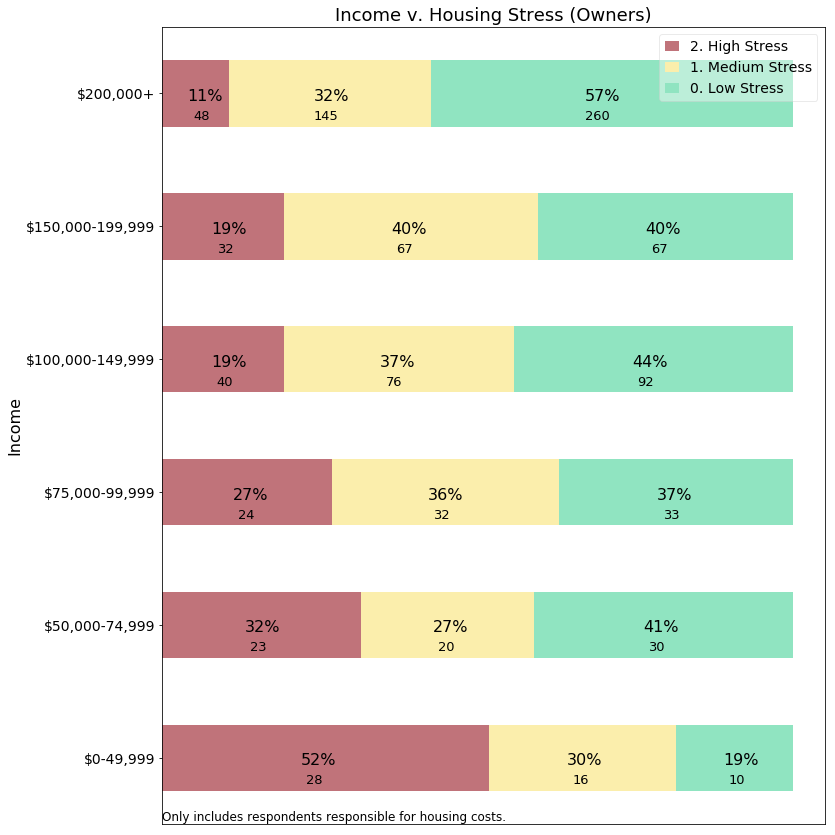

In [567]:
# Income v. Stress - Owners
dfc = plotdf.loc[(plotdf['IncomeCode1'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'), 
                 ['IncomeCode1', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='IncomeCode1', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]
dfp.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Income v. Housing Stress (Owners)', 'Income', 'upper right', stress_colors )
save_figure('owner_income_stress_percent.png')   

annotating patches float
StressBand   2. High Stress  1. Medium Stress  0. Low Stress
IncomeCode1                                                 
0                      16.0               9.0            1.0
50000                  10.0               2.0            NaN
75000                   7.0               1.0            2.0
100000                  6.0               4.0            5.0
150000                  5.0               5.0            2.0
200000                  7.0               2.0            3.0
Saving figure E:\LexingtonSurvey\charts\relationships\renter_income_stress_percent.png


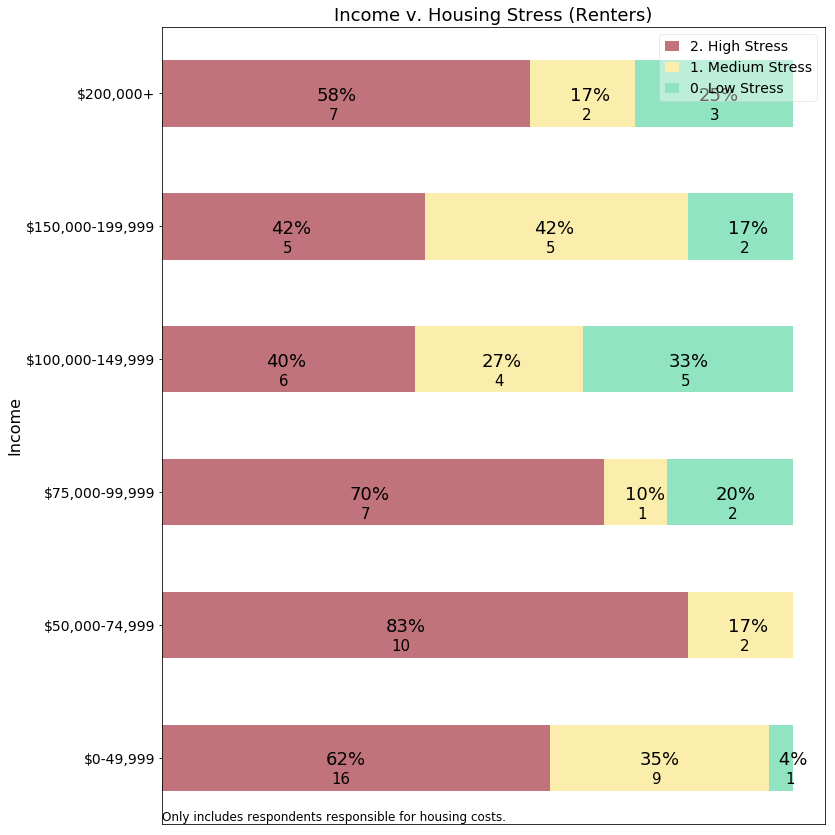

In [536]:
# Income v. Stress - Renters
dfc = plotdf.loc[(plotdf['IncomeCode1'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Rent'),
                 ['IncomeCode1', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='IncomeCode1', columns='StressBand', aggfunc='count')


dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]
dfp.sort_index(inplace=True)

barh_stacked_number_pct(dfp, 'Income v. Housing Stress (Renters)', 'Income', 'upper right', stress_colors )
save_figure('renter_income_stress_percent.png')  


annotating patches float
StressBand       2. High Stress  1. Medium Stress  0. Low Stress
MarketValueCode                                                 
0                             8                 9             11
500000                       46                53             78
750000                       72               145            181
1000000                      51               100            143
1250000                      20                41             66
1500000                      12                27             45
1750000                       6                17             22
2000000                       6                11             38
Saving figure E:\LexingtonSurvey\charts\relationships\owner_MarketValueCode_stress_percent.png


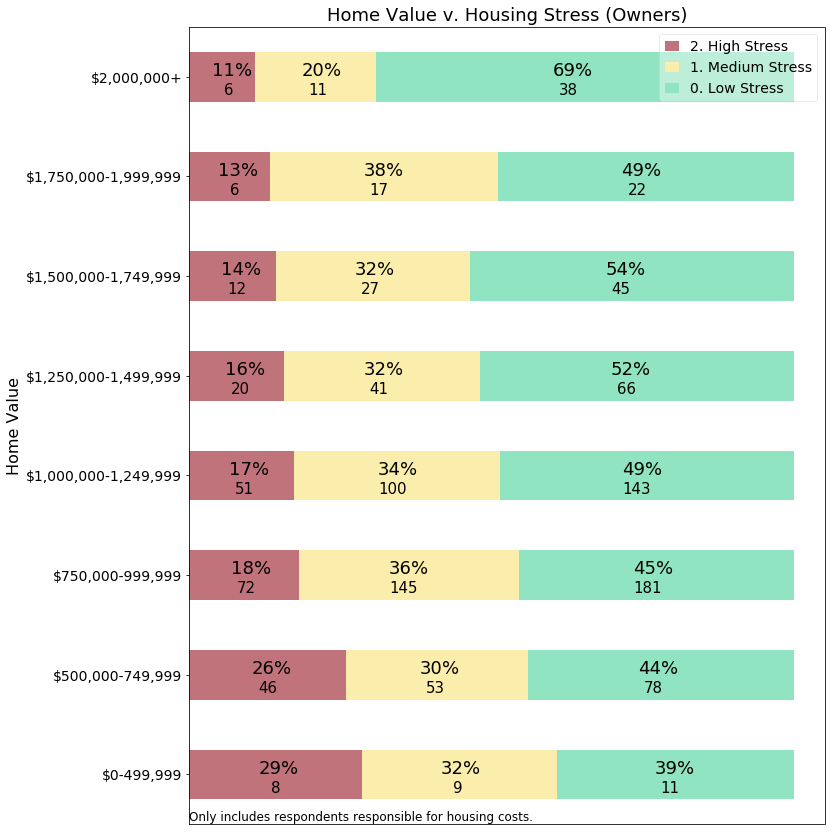

annotating patches float
StressBand        2. High Stress  1. Medium Stress  0. Low Stress
MarketValueCode1                                                 
0                             54                62             89
750000                        72               145            181
1000000                       51               100            143
1250000                       20                41             66
1500000                       12                27             45
1750000                       12                28             60
Saving figure E:\LexingtonSurvey\charts\relationships\owner_MarketValueCode1_stress_percent.png


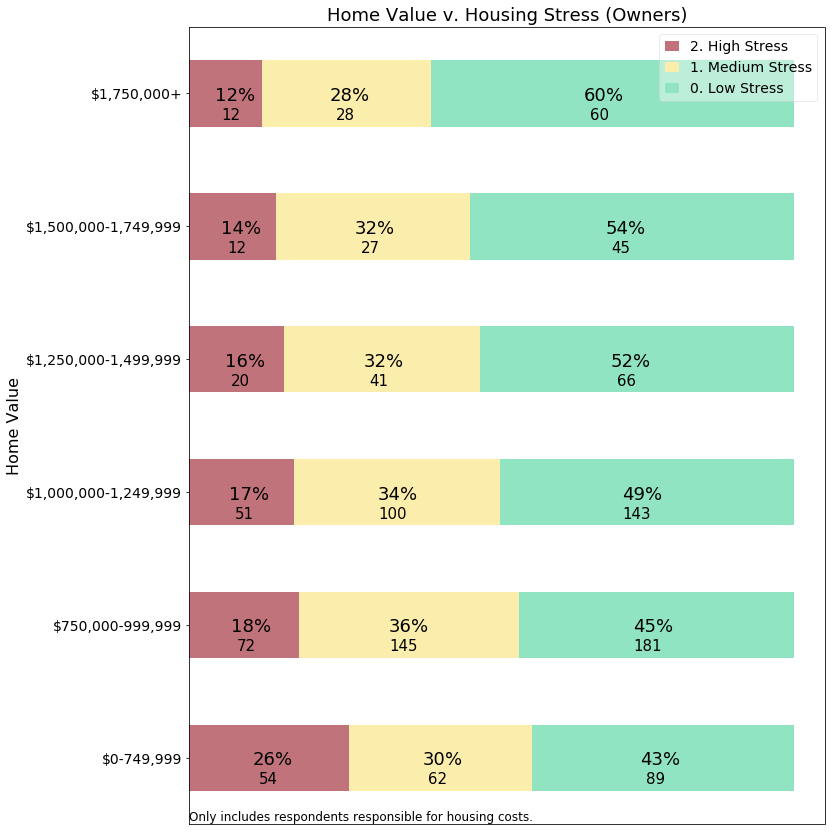

In [534]:
# Market Value v. Stress

for mvc in ['MarketValueCode','MarketValueCode1']:
    
    dfc = plotdf.loc[(plotdf[mvc] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'),
                     [mvc, 'StressCode', 'StressBand']]
    dfp = pd.pivot_table(dfc,  values='StressCode',
                         index=mvc, columns='StressBand', aggfunc='count')
    dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

    dfp.sort_index(inplace=True)
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    dfp_pct.sort_index(inplace=True)
    
    barh_stacked_number_pct(dfp, 'Home Value v. Housing Stress (Owners)','Home Value', 'upper right', stress_colors )
    save_figure('owner_%s_stress_percent.png' % mvc)
    


calling annotate patches
is stacked
Saving figure E:\LexingtonSurvey\charts\relationships\owner_marketvalue_highstress_percent.png


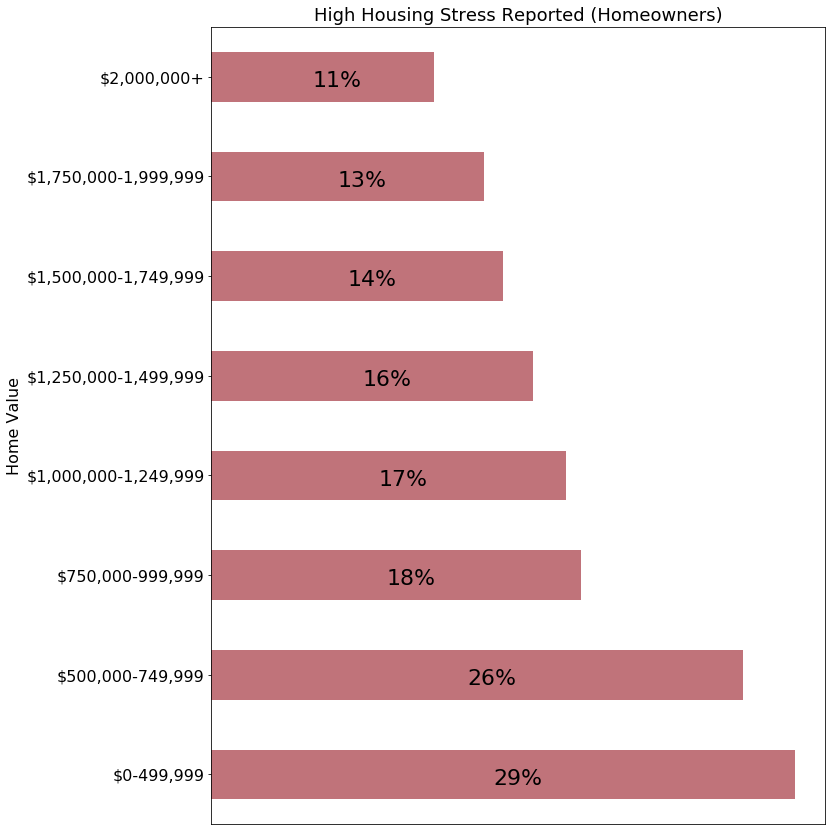

In [501]:
# Presentation Plot
dfc = plotdf.loc[(plotdf['MarketValueCode'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'),
                 ['MarketValueCode', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='MarketValueCode', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

dfp.sort_index(inplace=True)

#####################################

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
dfp_pct = dfp_pct['2. High Stress']
params = {'legend.fontsize': 14,
          'legend.handlelength': 1}
plt.rcParams.update(params)

ax = dfp_pct.plot.barh(stacked=True,  fontsize=16, color='xkcd:dusty rose', figsize=(12,12))  # df.plot.bar(title="Scores")
plot_title('High Housing Stress Reported (Homeowners)', fontsize=18, prefix='')
ylabel_range_annotation(ax)

ax.set_ylabel('Home Value', fontsize=16)
ax.set_xlabel('')
ax.set_xticks([])
annotate_patches_float(True, ax.patches, precision=0)

save_figure('owner_marketvalue_highstress_percent.png')

Assigned temps: MonthlyHousingCost
$10,001+          0
$2,001-$4,000     4
$4,001-$6,000     3
$6,001-$8,000     2
$8,001-$10,000    1
<$2,000/month     5
Name: temp, dtype: int64
annotating patches float
StressBand          2. High Stress  1. Medium Stress  0. Low Stress
MonthlyHousingCost                                                 
<$2,000/month                   31                47            142
$2,001-$4,000                   73               162            221
$4,001-$6,000                   70               105             97
$6,001-$8,000                   16                40             40
$8,001-$10,000                   9                17             15
$10,001+                         3                 5             11
Saving figure E:\LexingtonSurvey\charts\relationships\owner_monthlyhousing_stress_percent.png


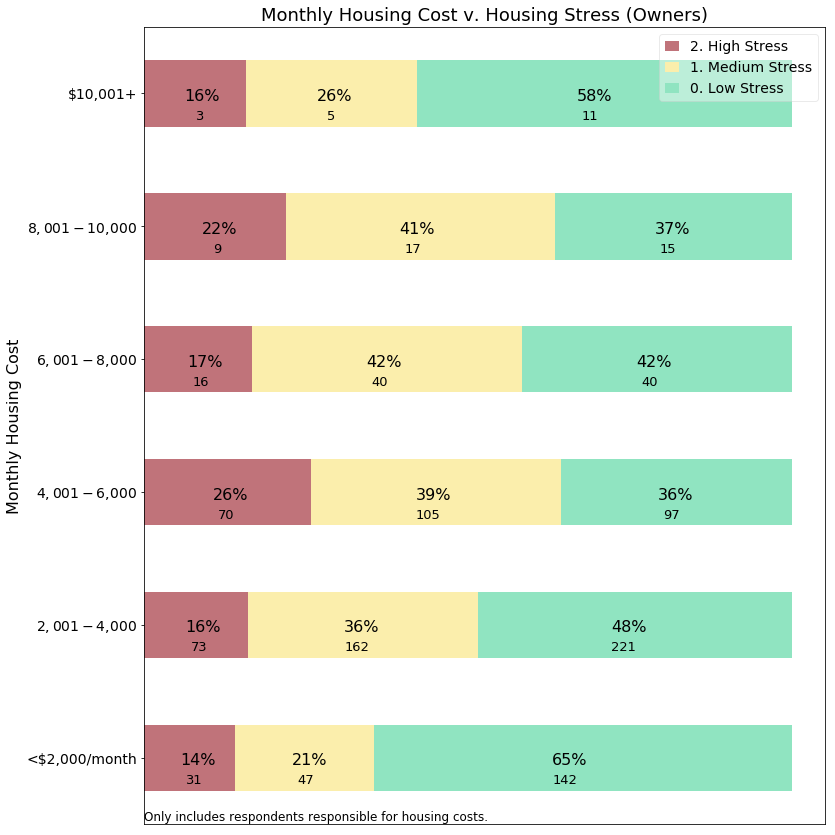

In [572]:
# MonthlyHousingCost v. Stress - Owners

dfc = plotdf.loc[(plotdf['MonthlyHousingCost'] != 'ResponseError') & (plotdf['MonthlyHousingCost'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'), 
                 ['MonthlyHousingCost', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='MonthlyHousingCost', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]


special_sort(dfp, 'MonthlyHousingCost')
#dfp.sort_index(inplace=True)

barh_stacked_number_pct(dfp, 'Monthly Housing Cost v. Housing Stress (Owners)', 'Monthly Housing Cost', 'upper right', stress_colors,
                       ylabel_dollar_prefix=True, do_ylabel_range_annotation=False)
save_figure('owner_monthlyhousing_stress_percent.png')   

Assigned temps: PropertyTaxShare
Little (1-25%)           3
None                     4
Significant (51-75%)     1
Some (26-50%)            2
Substantial (76-100%)    0
Name: temp, dtype: int64
annotating patches float
StressBand             2. High Stress  1. Medium Stress  0. Low Stress
PropertyTaxShare                                                      
None                              NaN               NaN            5.0
Little (1-25%)                   21.0              82.0          135.0
Some (26-50%)                    95.0             190.0          225.0
Significant (51-75%)             66.0              68.0          118.0
Substantial (76-100%)            30.0              41.0           63.0
Saving figure E:\LexingtonSurvey\charts\relationships\owner_propertytaxshare_stress_percent.png


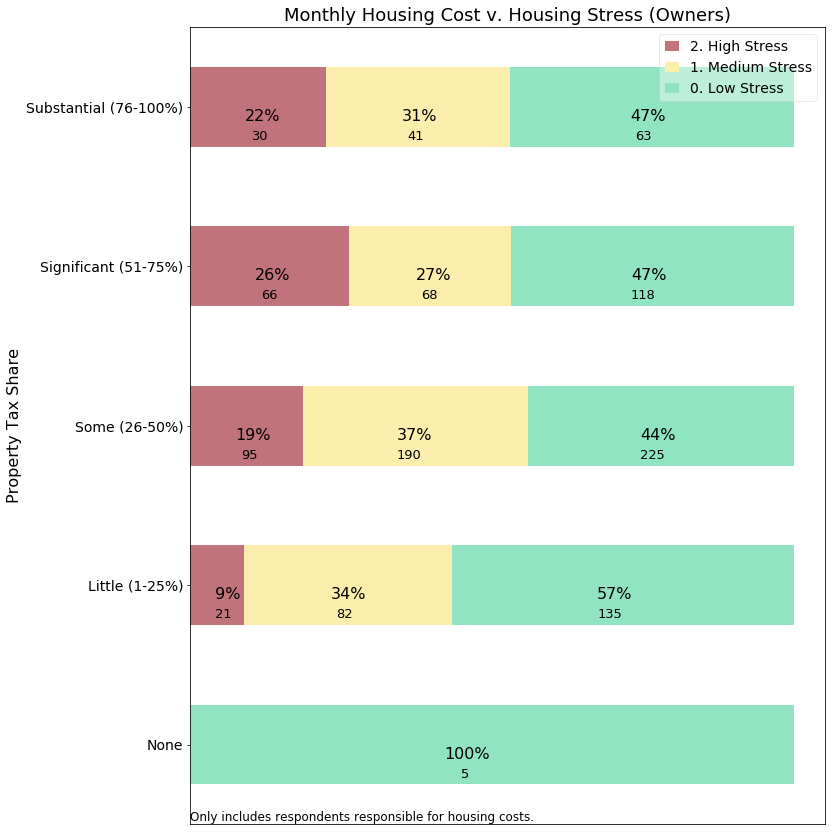

In [573]:
# MonthlyHousingCost v. Stress - Owners

dfc = plotdf.loc[(plotdf['PropertyTaxShare'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'), 
                 ['PropertyTaxShare', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='PropertyTaxShare', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]


special_sort(dfp, 'PropertyTaxShare')
#dfp.sort_index(inplace=True)

barh_stacked_number_pct(dfp, 'Monthly Housing Cost v. Housing Stress (Owners)', 'Property Tax Share', 'upper right', stress_colors,
                       ylabel_dollar_prefix=False, do_ylabel_range_annotation=False)
save_figure('owner_propertytaxshare_stress_percent.png')   

ValueError: invalid literal for int() with base 10: 'Own'

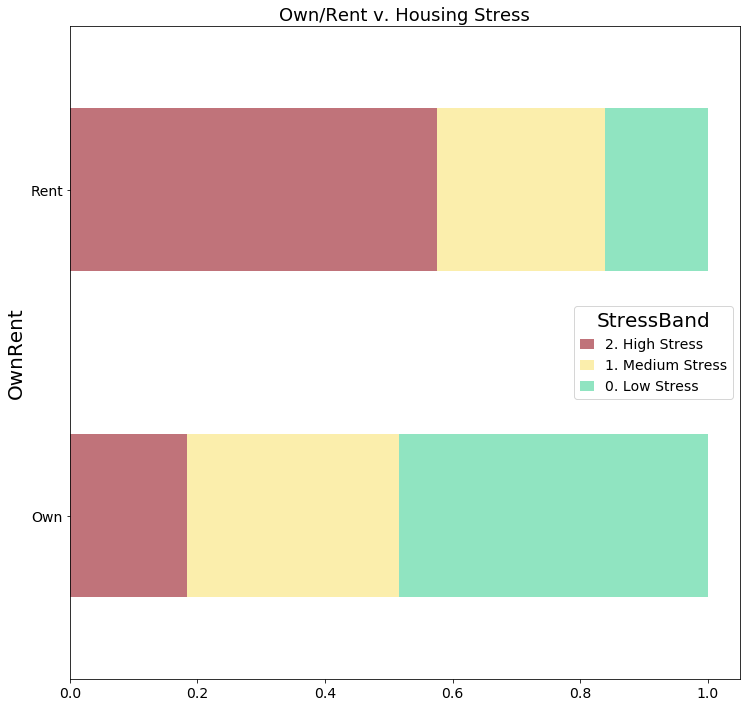

In [574]:
dfc = plotdf.loc[(plotdf['OwnRent'] != '-1') & (plotdf['StressCode']>=0),
                 ['OwnRent', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='OwnRent', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

dfp.sort_index(inplace=True)

##    
barh_stacked_number_pct(dfp, 'Own/Rent v. Housing Stress', 'Own or Rent', 'upper right', stress_colors )
save_figure('ownrent_stress_percent.png')

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
ax = dfp_pct.plot.barh(stacked=True,  fontsize=22, figsize=(12,12))  # df.plot.bar(title="Scores")
plot_title('Own/Rent v. Stress (response %)')
ax.set_ylabel('Own or Rent', fontsize=20)
ax.set_xlabel('')
ax.set_xticks([])
label_fontsize = 16
label_horiz_adj = label_fontsize * 2.0 / 3.0
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
annotate_patches_float(True, ax.patches)
ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
        verticalalignment='bottom', size='large', transform=ax.transAxes)
save_figure('ownrent_stress_percent.png')    

###

ax = dfp.plot.barh(stacked=False, fontsize=20, figsize=(12,12))
plot_title('Own/Rent Value v. Stress (response counts)')
ax.set_ylabel('Own or Rent', fontsize=20)
ax.set_xlabel('Response Count', fontsize=20)

legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
annotate_patches_integer(False, ax.patches)
ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
        verticalalignment='bottom', size='large', transform=ax.transAxes)
save_figure('ownrent_stress_response.png')

StressBand  2. High Stress  1. Medium Stress  0. Low Stress
OwnRent                                                    
Own                    221               403            584
Rent                    57                26             16
StressBand  2. High Stress  1. Medium Stress  0. Low Stress
OwnRent                                                    
Own               0.182947          0.333609       0.483444
Rent              0.575758          0.262626       0.161616
OwnRent
Own     0.182947
Rent    0.575758
Name: 2. High Stress, dtype: float64
calling annotate patches
is stacked
Saving figure E:\LexingtonSurvey\charts\relationships\ownrent_highstress_percent.png


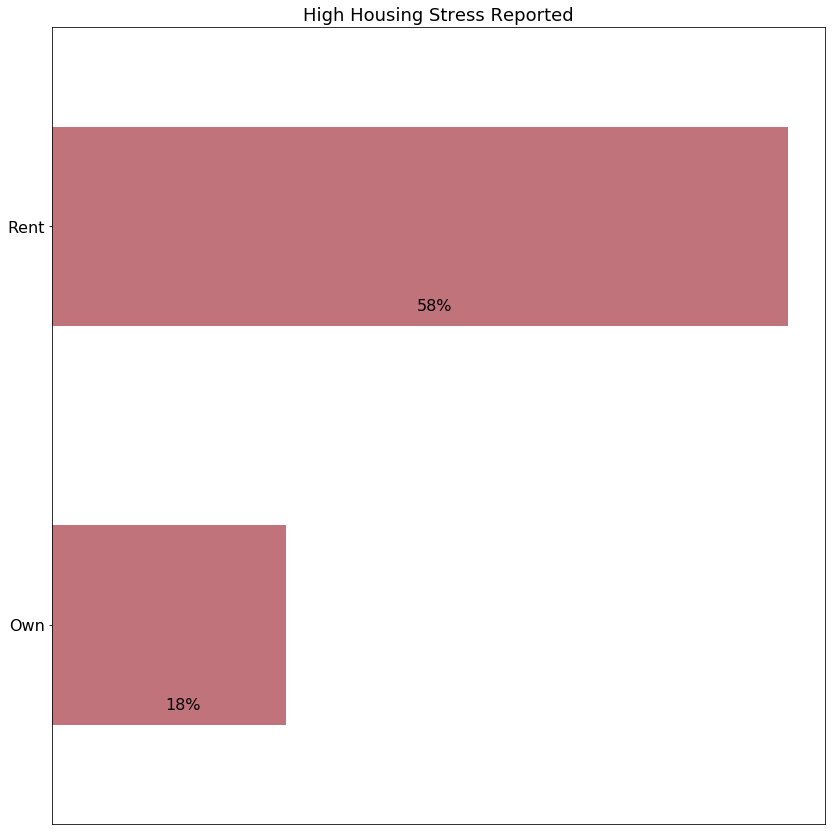

done


In [533]:
# Presentation Chart
dfc = plotdf.loc[(plotdf['OwnRent'] != '-1') & (plotdf['StressCode']>=0),
                 ['OwnRent', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='OwnRent', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]


dfp.sort_index(inplace=True)
print dfp

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)

print dfp_pct
dfp_pct = dfp_pct['2. High Stress']
print dfp_pct

ax = dfp_pct.plot.barh(stacked=True,  fontsize=16,  color='xkcd:dusty rose', figsize=(12,12))  # df.plot.bar(title="Scores")
plot_title('High Housing Stress Reported', fontsize=18, prefix='')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticks([])
label_fontsize =18
label_horiz_adj = label_fontsize * 2.0 / 3.0
#legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
annotate_patches_float(True, ax.patches, precision=0, label_fontsize=16)
#ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
#        verticalalignment='bottom', size='large', transform=ax.transAxes)

save_figure('ownrent_highstress_percent.png')    
print 'done'

annotating patches float
RelocationBand  Likely  Neutral  Unlikely
OwnRent                                  
Own                421      424       386
Rent                50       28        20
Saving figure E:\LexingtonSurvey\charts\relationships\own_rent_migration_percent.png


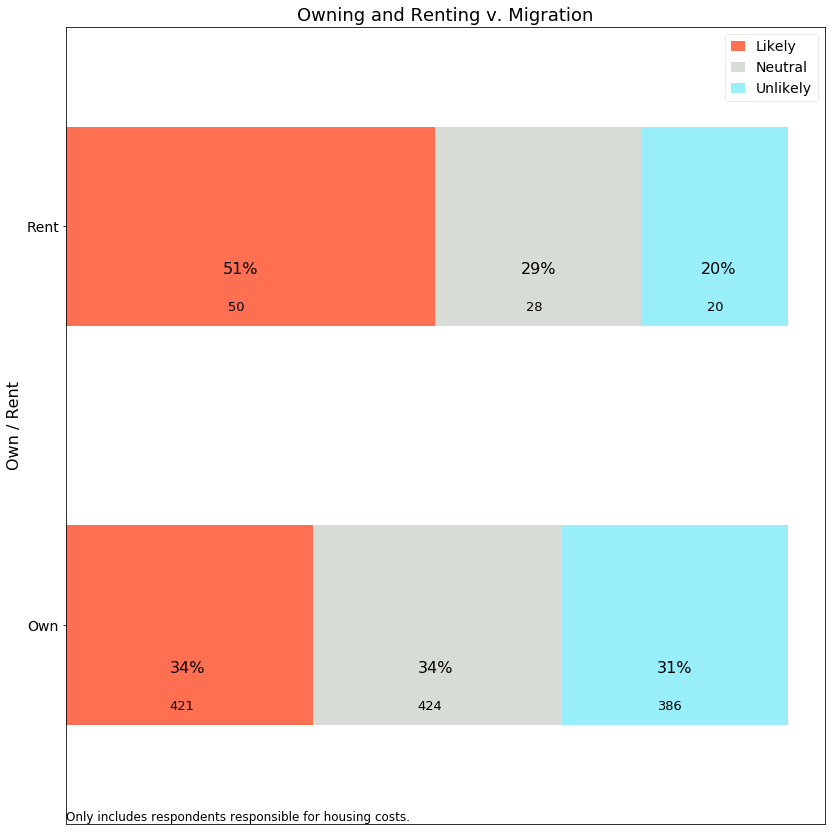

In [580]:
# Own/Rent v. Migration
dfc = plotdf.loc[(plotdf['OwnRent'] != '-1') & (plotdf['RelocationBand']>=0),
                 ['OwnRent', 'RelocationBand', 'RelocationCode']]
dfp = pd.pivot_table(dfc, 
                     values='RelocationCode',
                     index='OwnRent', columns='RelocationBand', aggfunc='count')

dfp.sort_index(inplace=True)
dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
#dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Owning and Renting v. Migration','Own / Rent', 'upper right', migration_colors,
                        ylabel_dollar_prefix=False, 
                            do_ylabel_range_annotation=False)
save_figure('own_rent_migration_percent.png')    

annotating patches float
RelocationBand   Likely  Neutral  Unlikely
MarketValueCode                           
0                     8       10        10
500000               51       78        55
750000              152      129       122
1000000             103      107        90
1250000              40       46        42
1500000              30       23        34
1750000              18       13        15
2000000              19       18        18
Saving figure E:\LexingtonSurvey\charts\relationships\owner_MarketValueCode_migration_percent.png


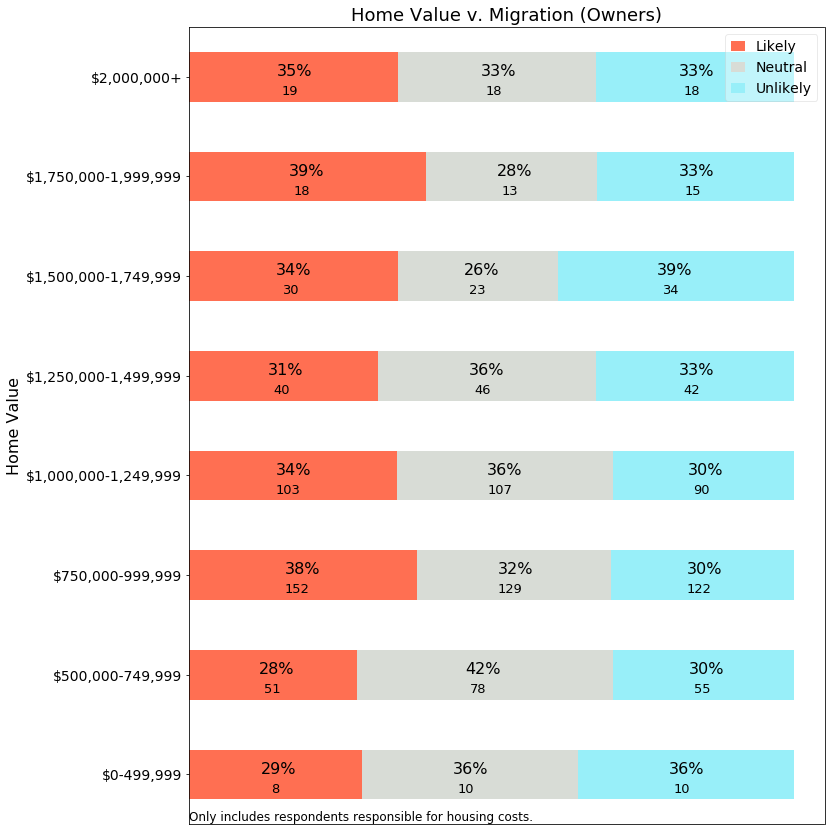

annotating patches float
RelocationBand    Likely  Neutral  Unlikely
MarketValueCode1                           
0                     59       88        65
750000               152      129       122
1000000              103      107        90
1250000               40       46        42
1500000               30       23        34
1750000               37       31        33
Saving figure E:\LexingtonSurvey\charts\relationships\owner_MarketValueCode1_migration_percent.png


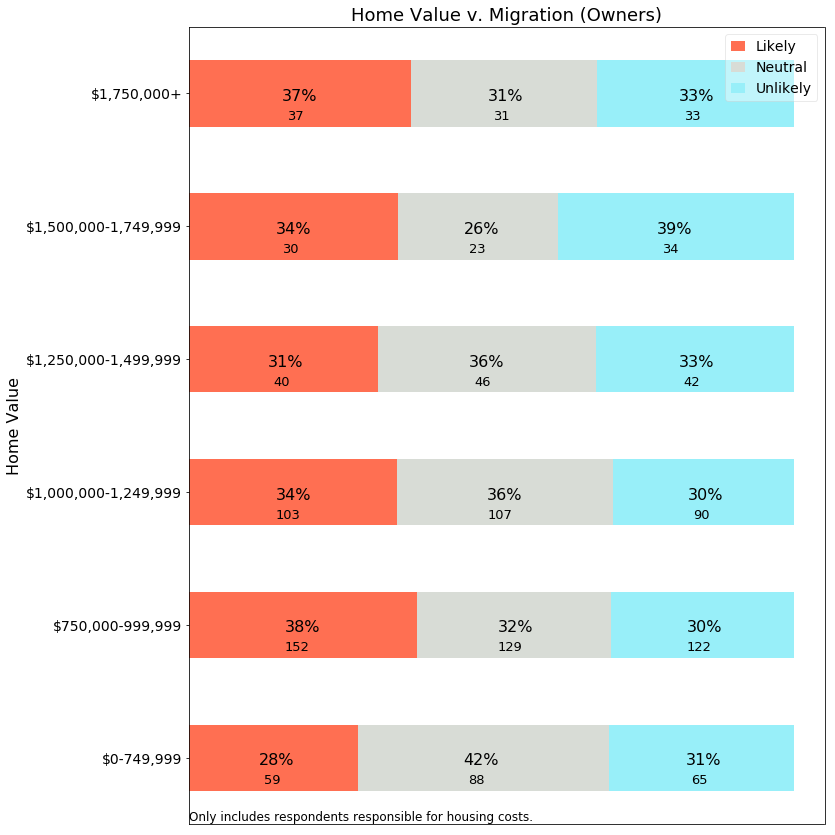

In [546]:
for mvc in ['MarketValueCode','MarketValueCode1']:
    dfc = plotdf.loc[(plotdf[mvc] != -1) & (plotdf['RelocationBand']>=0) & (plotdf['OwnRent'] == 'Own'),
                     [mvc, 'RelocationBand', 'RelocationCode']]
    dfp = pd.pivot_table(dfc, 
                         values='RelocationCode',
                         index=mvc, columns='RelocationBand', aggfunc='count')

    dfp.sort_index(inplace=True)
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    #dfp_pct.sort_index(inplace=True)
    barh_stacked_number_pct(dfp, 'Home Value v. Migration (Owners)','Home Value', 'upper right', migration_colors)
    save_figure('owner_%s_migration_percent.png' % mvc)    

annotating patches float
RelocationBand  Likely  Neutral  Unlikely
IncomeCode1                              
0                   18       24        15
50000               36       22        15
75000               32       38        20
100000              81       77        51
150000              57       62        49
200000             137      130       188
Saving figure E:\LexingtonSurvey\charts\relationships\owner_income_migration_percent.png


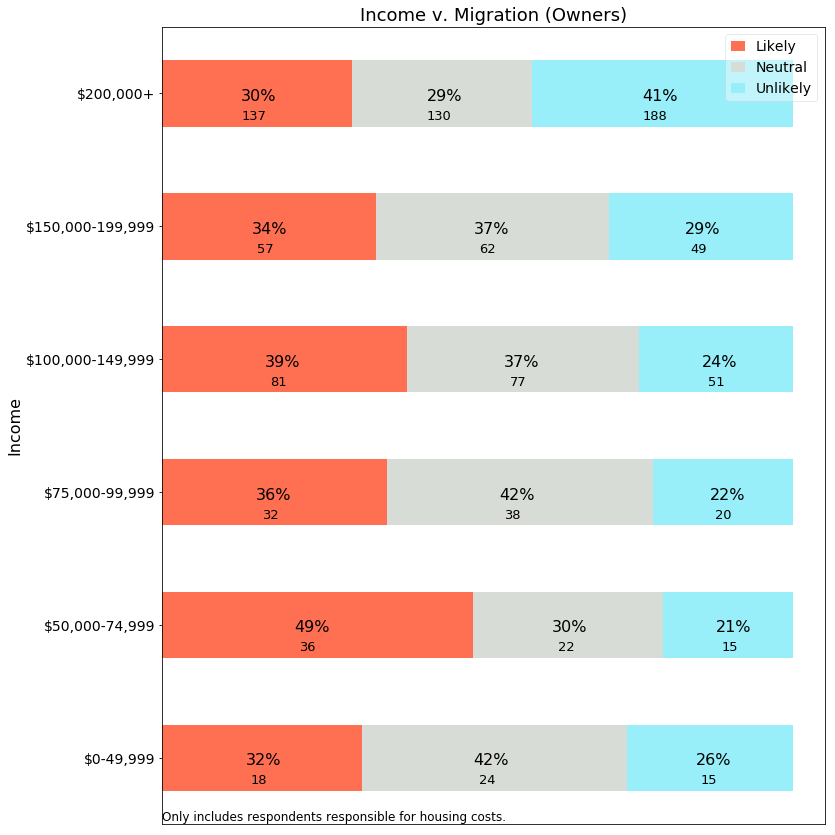

In [547]:
dfc = plotdf.loc[(plotdf['IncomeCode1'] != -1) & (plotdf['RelocationBand']>=0) & (plotdf['OwnRent'] == 'Own'),
                 ['IncomeCode1', 'RelocationBand', 'RelocationCode']]
dfp = pd.pivot_table(dfc, 
                     values='RelocationCode',
                     index='IncomeCode1', columns='RelocationBand', aggfunc='count')

dfp.sort_index(inplace=True)

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Income v. Migration (Owners)', 'Income', 'upper right', migration_colors)
save_figure('owner_income_migration_percent.png')


annotating patches float
RelocationBand  Likely  Neutral  Unlikely
IncomeCode1                              
0                    7        9        10
50000                6        3         3
75000                6        3         1
100000               9        5         1
150000               8        3         1
200000               5        2         4
Saving figure E:\LexingtonSurvey\charts\relationships\renter_income_migration_percent.png


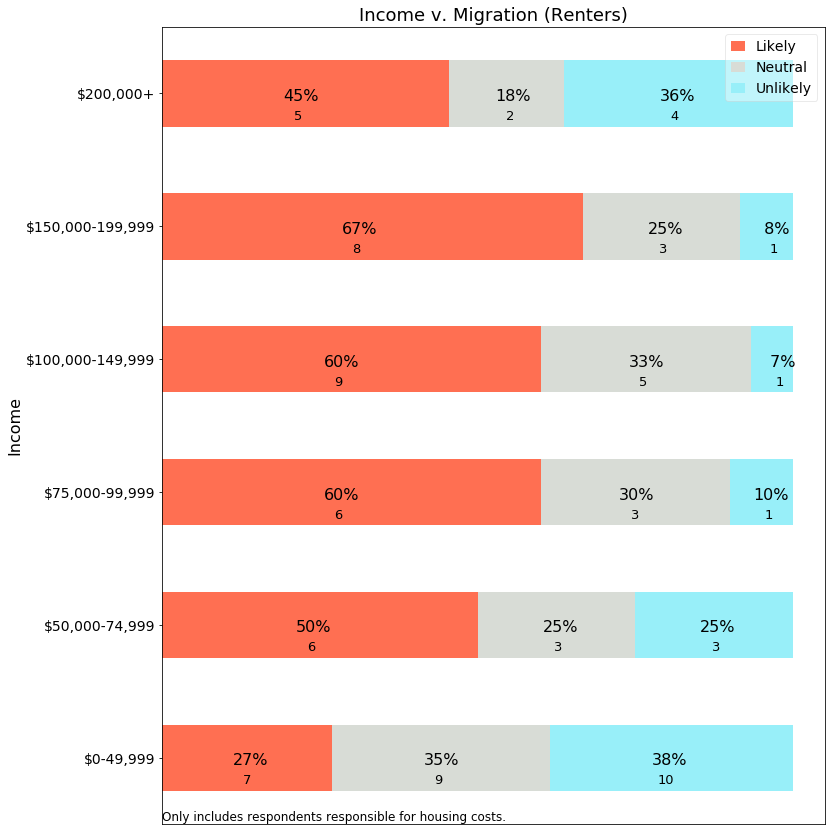

In [548]:
dfc = plotdf.loc[(plotdf['IncomeCode1'] != -1) & (plotdf['RelocationBand']>=0) & (plotdf['OwnRent'] == 'Rent'),
                 ['IncomeCode1', 'RelocationBand', 'RelocationCode']]
dfp = pd.pivot_table(dfc, 
                     values='RelocationCode',
                     index='IncomeCode1', columns='RelocationBand', aggfunc='count')

dfp.sort_index(inplace=True)
dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Income v. Migration (Renters)', 'Income', 'upper right', migration_colors)
save_figure('renter_income_migration_percent.png')

annotating patches float
StressBand       2. High Stress  1. Medium Stress  0. Low Stress
MonthlyRentCode                                                 
0                            14                 3              2
1500                         21                14              8
3000                         18                 8              3
4500                          4                 1              3
Saving figure E:\LexingtonSurvey\charts\relationships\renter_rent_stress_percent.png


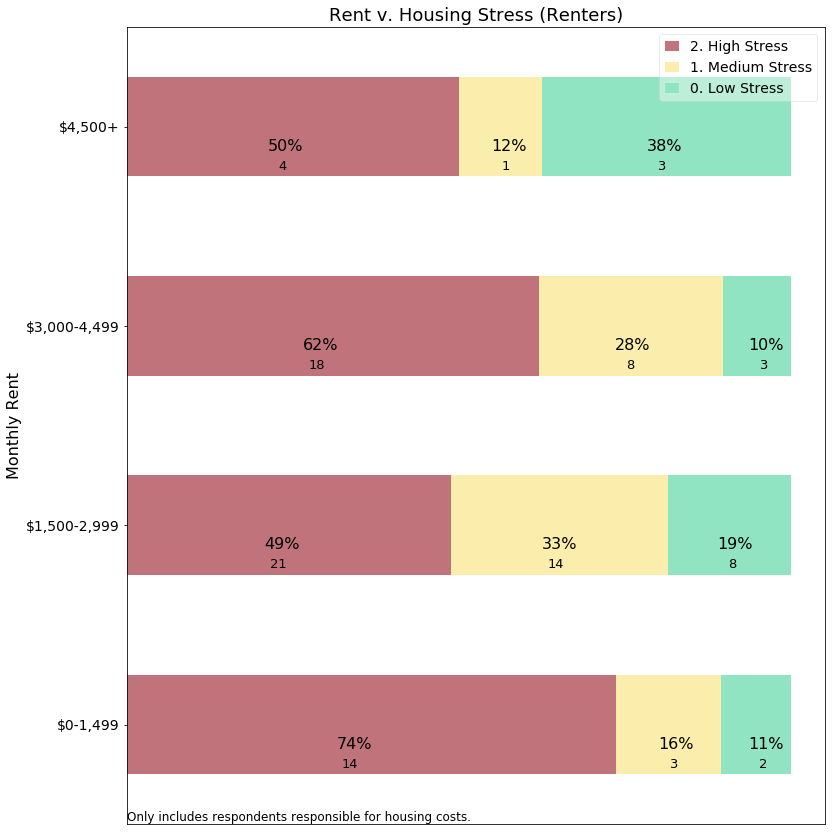

In [518]:
dfc = plotdf.loc[(plotdf['MonthlyRentCode'] != -1) & (plotdf['StressCode']>=0) & (plotdf['OwnRent'] == 'Rent'),
                 ['MonthlyRentCode', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='MonthlyRentCode', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

dfp.sort_index(inplace=True)
dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Rent v. Housing Stress (Renters)', 'Monthly Rent', 'upper right', stress_colors)
save_figure('renter_rent_stress_percent.png')


annotating patches float
RelocationBand   Likely  Neutral  Unlikely
MonthlyRentCode                           
0                     5        6         7
1500                 25       14         4
3000                 16        6         7
4500                  4        2         2
Saving figure E:\LexingtonSurvey\charts\relationships\renter_rent_migration_percent.png


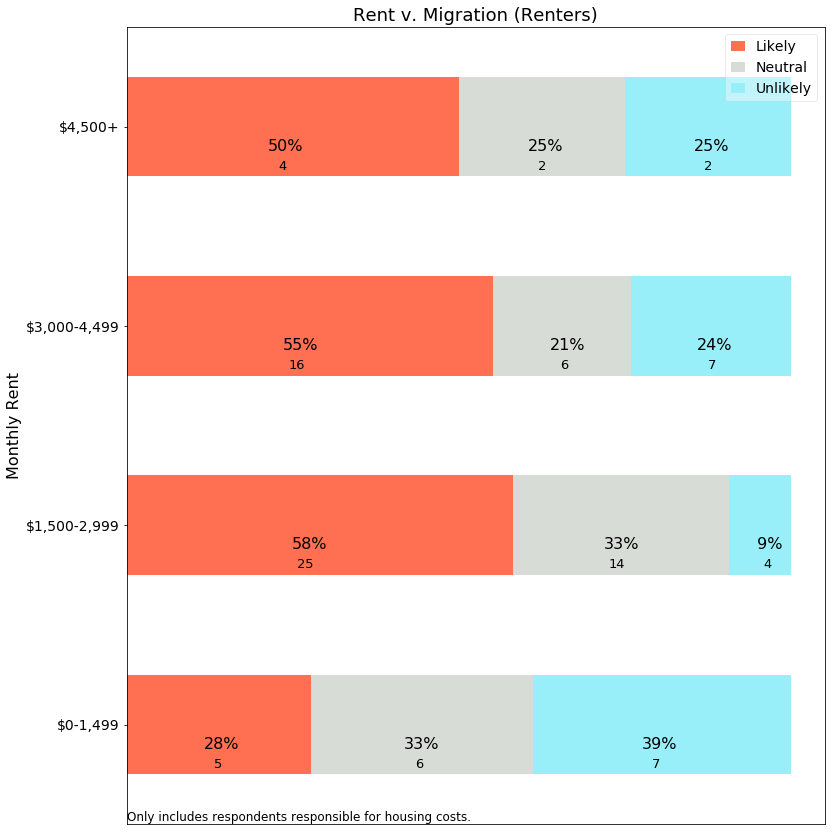

In [549]:
dfc = plotdf.loc[(plotdf['MonthlyRentCode'] != -1) & (plotdf['RelocationBand']>=0) & (plotdf['OwnRent'] == 'Rent'),
                 ['MonthlyRentCode', 'RelocationBand', 'RelocationCode']]
dfp = pd.pivot_table(dfc, 
                     values='RelocationCode',
                     index='MonthlyRentCode', columns='RelocationBand', aggfunc='count')

dfp.sort_index(inplace=True)

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Rent v. Migration (Renters)', 'Monthly Rent', 'upper right', migration_colors)
save_figure('renter_rent_migration_percent.png')

annotating patches float
RelocationBand  Likely  Neutral  Unlikely
AgeCode                                  
0                  NaN      1.0       3.0
30                20.0     23.0      59.0
40               105.0    110.0     135.0
50               144.0    104.0      49.0
60                83.0     67.0      62.0
70                50.0     83.0      42.0
80                15.0     33.0      28.0
Saving figure E:\LexingtonSurvey\charts\relationships\owner_AgeCode_migration_percent.png


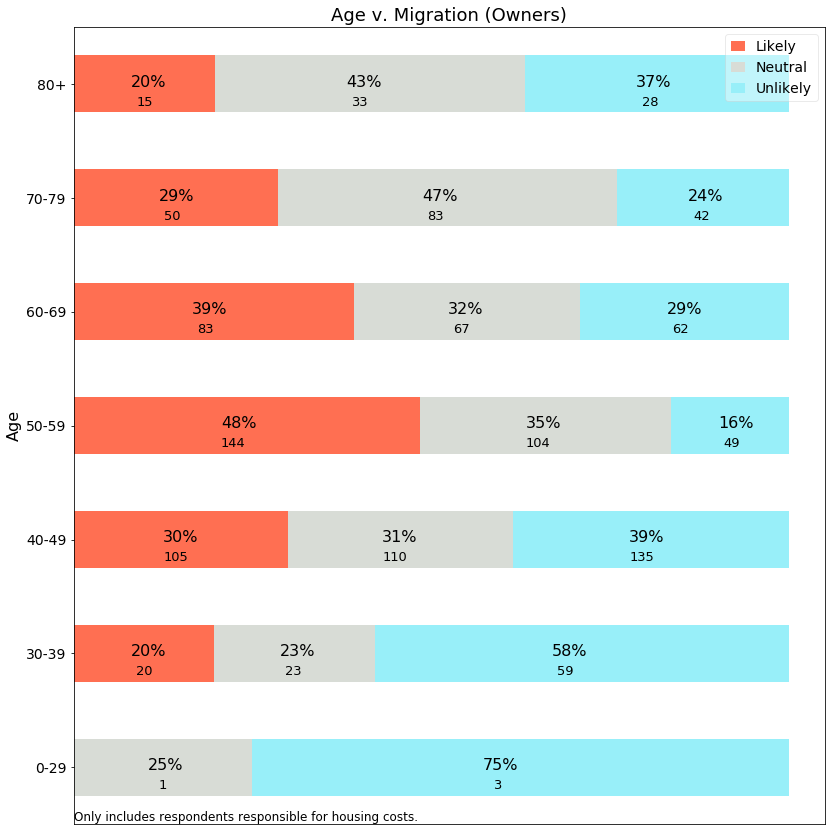

annotating patches float
RelocationBand  Likely  Neutral  Unlikely
AgeCode1                                 
0                   20       24        62
40                 105      110       135
50                 144      104        49
60                  83       67        62
70                  65      116        70
Saving figure E:\LexingtonSurvey\charts\relationships\owner_AgeCode1_migration_percent.png


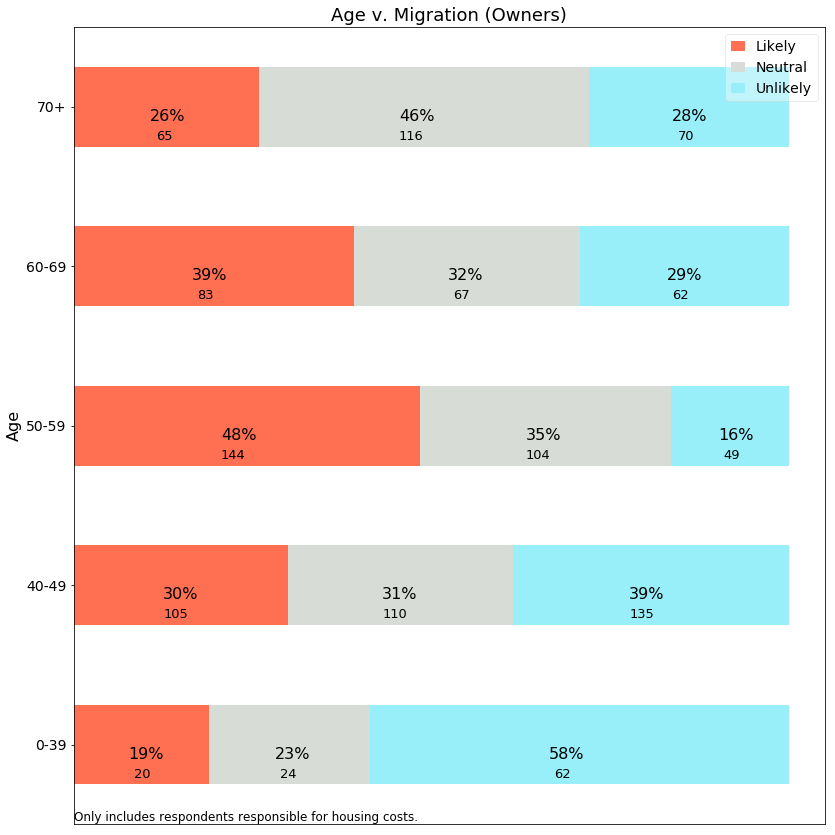

In [523]:
for ac in ['AgeCode','AgeCode1']:

    dfc = plotdf.loc[(plotdf[ac] != -1) & (plotdf['RelocationBand']>=0) & (plotdf['OwnRent'] == 'Own'),
                     [ac, 'RelocationBand', 'RelocationCode']]
    dfp = pd.pivot_table(dfc, 
                         values='RelocationCode',
                         index=ac, columns='RelocationBand', aggfunc='count')

    dfp.sort_index(inplace=True)
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    dfp_pct.sort_index(inplace=True)
    barh_stacked_number_pct(dfp, 'Age v. Migration (Owners)', 'Age', 'upper right', migration_colors, ylabel_dollar_prefix=False)
    save_figure('owner_%s_migration_percent.png' % ac)

annotating patches float
RelocationBand  Likely  Neutral  Unlikely
AgeCode1                                 
0                   10        7         3
40                  18        9         4
50                  14        6         1
60                   3        2         1
70                   5        4         9
Saving figure E:\LexingtonSurvey\charts\relationships\renter_age_migration_percent.png


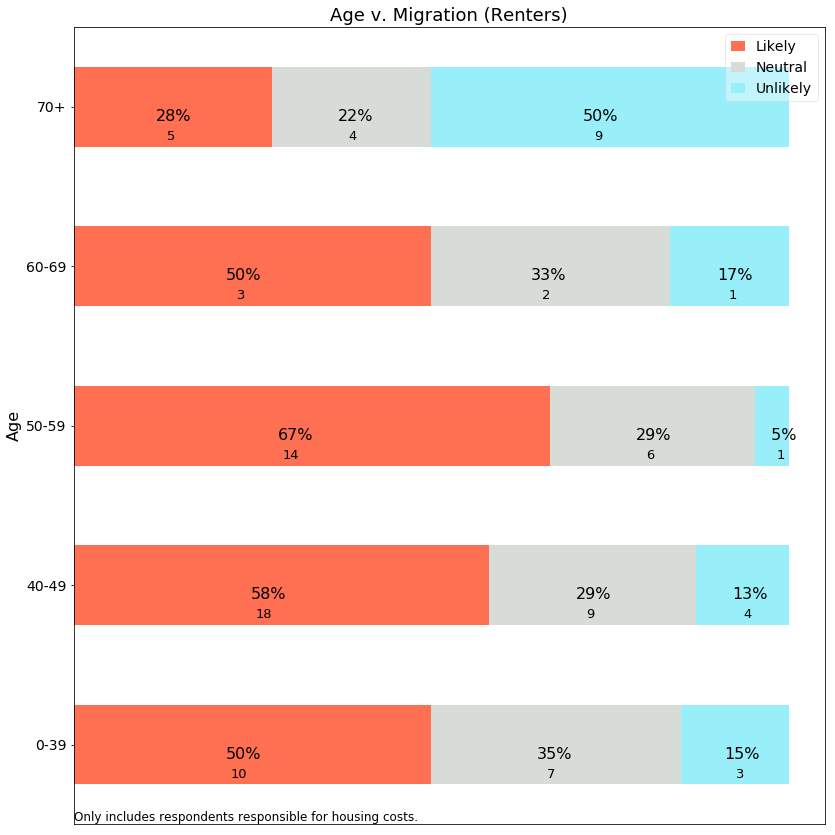

In [581]:
dfc = plotdf.loc[(plotdf['AgeCode1'] != -1) & (plotdf['RelocationBand']>=0) & (plotdf['OwnRent'] == 'Rent'),
                 ['AgeCode1', 'RelocationBand', 'RelocationCode']]
dfp = pd.pivot_table(dfc, 
                     values='RelocationCode',
                     index='AgeCode1', columns='RelocationBand', aggfunc='count')

dfp.sort_index(inplace=True)

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Age v. Migration (Renters)', 'Age', 'upper right', migration_colors, ylabel_dollar_prefix=False)
save_figure('renter_age_migration_percent.png')


annotating patches float
RelocationBand         Likely  Neutral  Unlikely
StressCodeDescriptive                           
0. None                    70      104       121
1. Little                  59      117       110
2. Some                   160      140       103
3. Significant             93       46        31
4. Substantial             32        9        10
Saving figure E:\LexingtonSurvey\charts\relationships\owner_stress_migration_percent.png


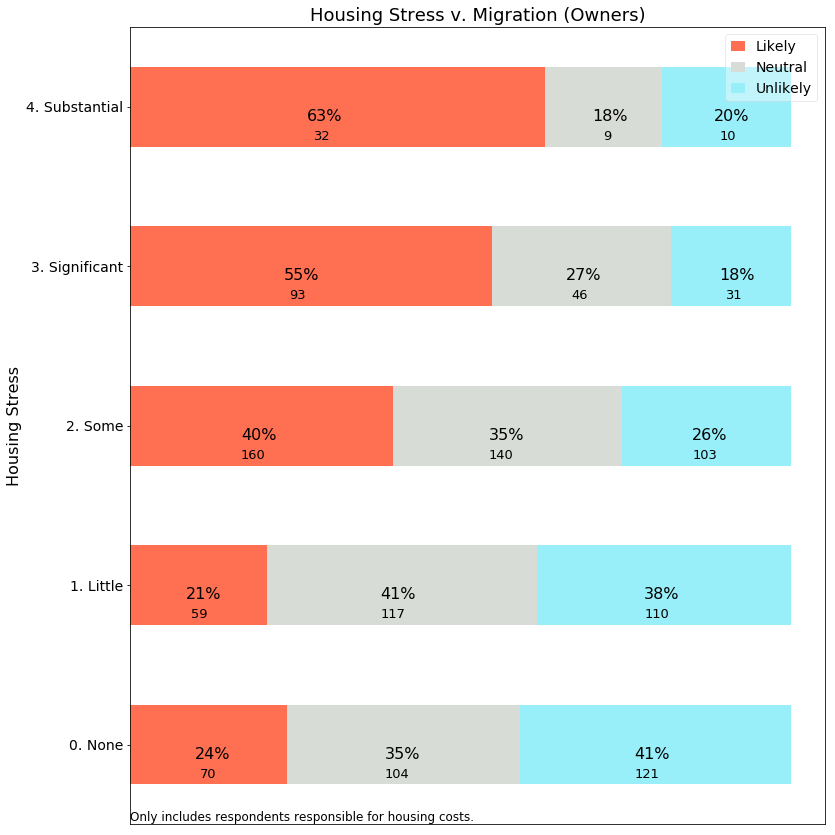

In [543]:
dfc = plotdf.loc[(plotdf['RelocationBand'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'),
                 ['RelocationBand', 'StressCode', 'StressCodeDescriptive']]
dfp = pd.pivot_table(dfc, values='StressCode',
                     index='StressCodeDescriptive', columns='RelocationBand', aggfunc='count')
dfp.sort_index(inplace=True)

###

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Housing Stress v. Migration (Owners)', 'Housing Stress', 'upper right', migration_colors,
                        ylabel_dollar_prefix=False, do_ylabel_range_annotation=False)
save_figure('owner_stress_migration_percent.png')


annotating patches float
RelocationBand             Likely  Neutral  Unlikely
Tenure                                              
moved in 1979 and earlier      65       88        59
moved in 1980-1989             37       46        31
moved in 1990-1999             84       73        42
moved in 2000-2009            117       82        76
moved in 2010-2014             68       88       103
moved in 2015 or later         41       38        60
Saving figure E:\LexingtonSurvey\charts\relationships\Owners_tenure_migration_percent.png


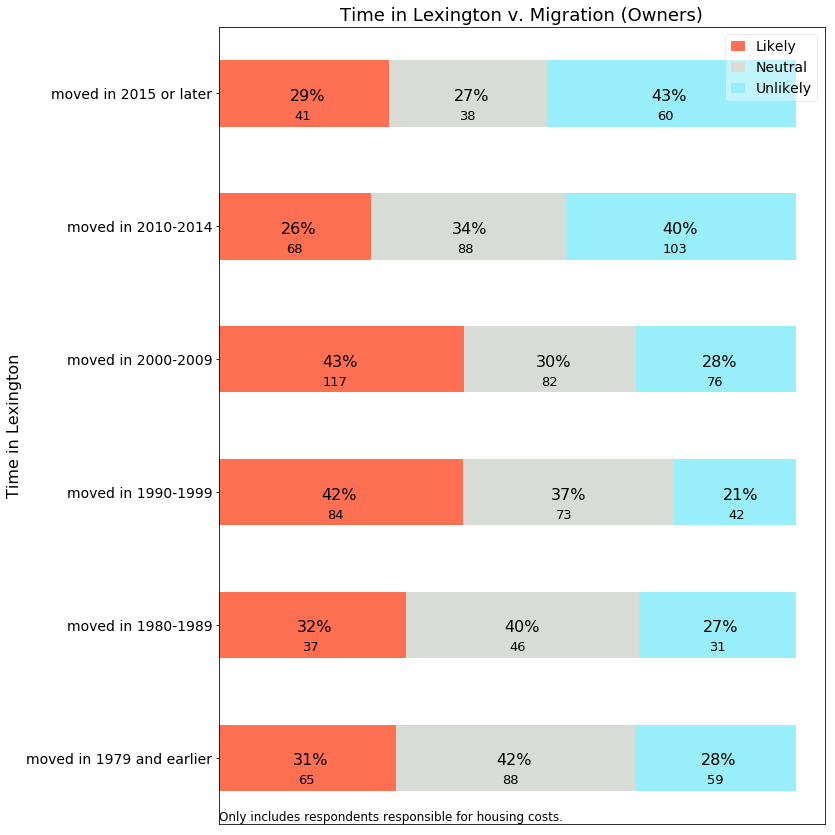

annotating patches float
RelocationBand             Likely  Neutral  Unlikely
Tenure                                              
moved in 1979 and earlier       2        1         1
moved in 1980-1989              1        2         1
moved in 1990-1999              1        3         2
moved in 2000-2009             12        2         6
moved in 2010-2014             16        3         1
moved in 2015 or later         17       16         9
Saving figure E:\LexingtonSurvey\charts\relationships\Renters_tenure_migration_percent.png


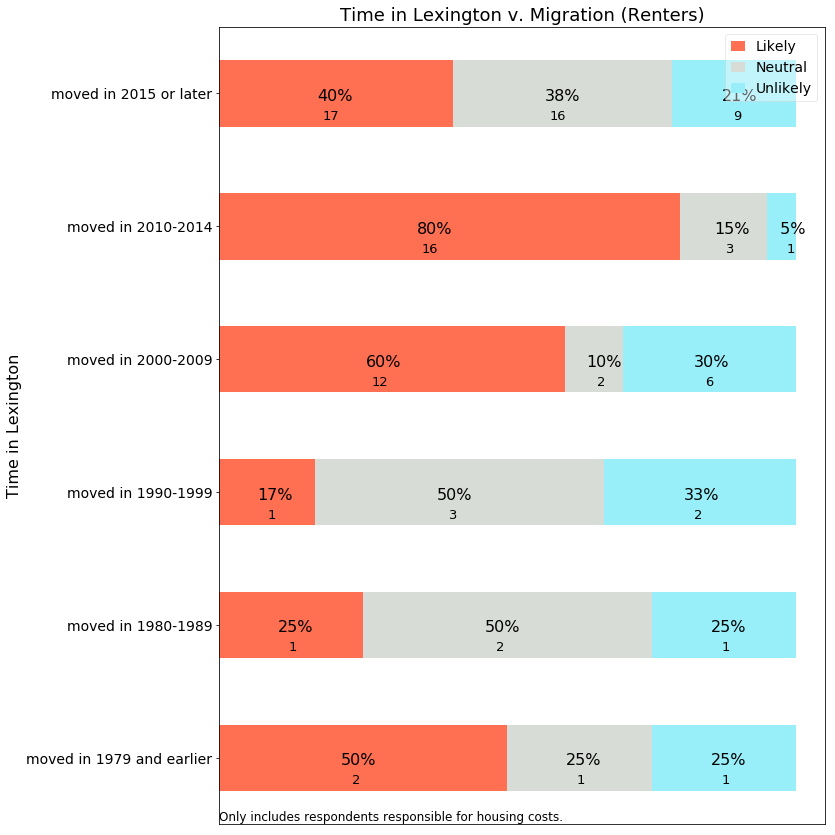

In [586]:
# Migration v. Tenure
for ownrent, ownrentlabel in [('Own', 'Owners'), ('Rent','Renters')]:
    dfc = plotdf.loc[(plotdf['RelocationBand'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']==ownrent),
                     ['RelocationBand', 'Tenure', 'TenureStat']]
    #print dfc
    dfp = pd.pivot_table(dfc, values='TenureStat',
                         index='Tenure', columns='RelocationBand', aggfunc='count')
    dfp.sort_index(inplace=True)
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    dfp_pct.sort_index(inplace=True)
    barh_stacked_number_pct(dfp, 'Time in Lexington v. Migration (%s)' % ownrentlabel, 'Time in Lexington', 'upper right', migration_colors,
                            ylabel_dollar_prefix=False, do_ylabel_range_annotation=False)
    save_figure('%sers_tenure_migration_percent.png' % ownrent)


Assigned temps: MonthlyHousingCost
$10,001+          0
$2,001-$4,000     4
$4,001-$6,000     3
$6,001-$8,000     2
$8,001-$10,000    1
<$2,000/month     5
Name: temp, dtype: int64
annotating patches float
RelocationBand      Likely  Neutral  Unlikely
MonthlyHousingCost                           
<$2,000/month           76       76        67
$2,001-$4,000          151      176       129
$4,001-$6,000           98       71       102
$6,001-$8,000           30       35        31
$8,001-$10,000          17       12        12
$10,001+                 9        6         4
Saving figure E:\LexingtonSurvey\charts\relationships\Owners_monthlyhousingcost_migration_percent.png


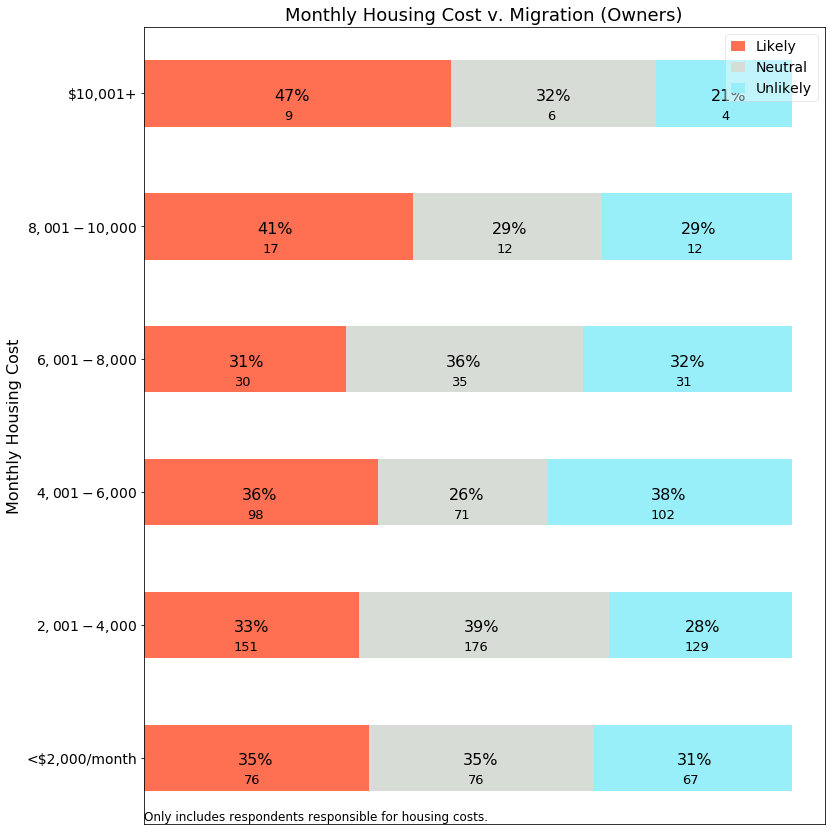

In [593]:
# Migration v. Monthly Housing Cost
for ownrent, ownrentlabel in [('Own', 'Owners')]:
    dfc = plotdf.loc[(plotdf['MonthlyHousingCost'] != 'ResponseError') &(plotdf['RelocationBand'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']==ownrent),
                     ['RelocationBand', 'MonthlyHousingCost', 'MonthlyHousingStat']]
   # print dfc
    dfp = pd.pivot_table(dfc, values='MonthlyHousingStat',
                         index='MonthlyHousingCost', columns='RelocationBand', aggfunc='count')
    # dfp.sort_index(inplace=True)
    special_sort(dfp, 'MonthlyHousingCost')    
    
    
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    dfp_pct.sort_index(inplace=True)
    barh_stacked_number_pct(dfp, 'Monthly Housing Cost v. Migration (%s)' % ownrentlabel, 'Monthly Housing Cost', 'upper right', migration_colors,
                            ylabel_dollar_prefix=False, do_ylabel_range_annotation=False)
    save_figure('%sers_monthlyhousingcost_migration_percent.png' % ownrent)


Assigned temps: PropertyTaxShare
Little (1-25%)           3
None                     4
Significant (51-75%)     1
Some (26-50%)            2
Substantial (76-100%)    0
Name: temp, dtype: int64
annotating patches float
RelocationBand         Likely  Neutral  Unlikely
PropertyTaxShare                                
None                        1        2         2
Little (1-25%)             62       79        97
Some (26-50%)             174      187       148
Significant (51-75%)      103       78        70
Substantial (76-100%)      64       41        29
Saving figure E:\LexingtonSurvey\charts\relationships\Owners_propertytaxshare_migration_percent.png


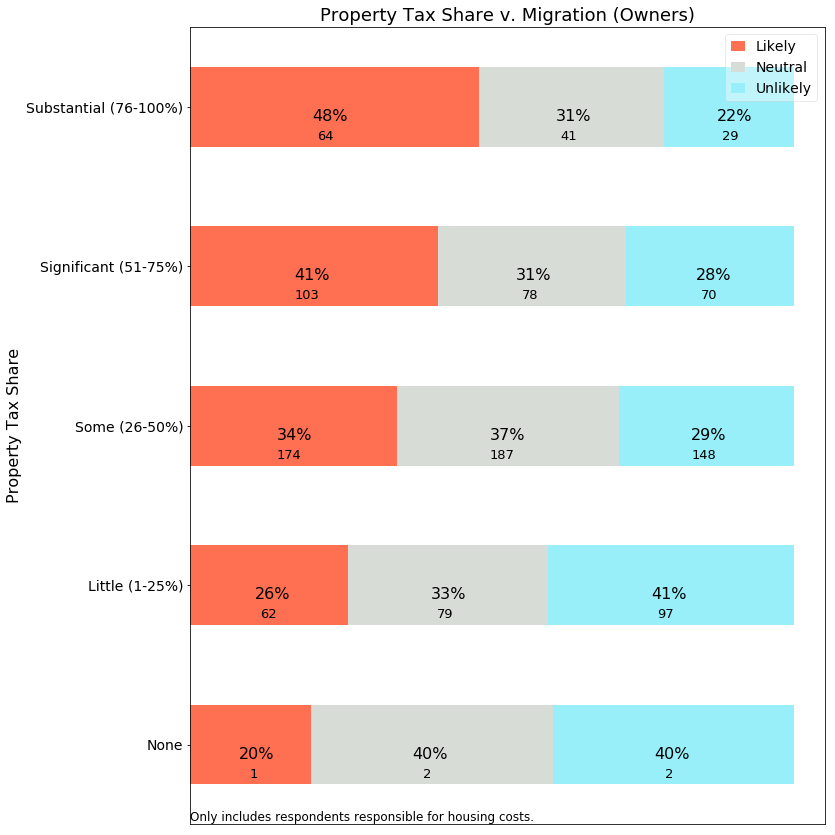

In [594]:
# Migration v. Property Tax Share
for ownrent, ownrentlabel in [('Own', 'Owners')]:
    dfc = plotdf.loc[(plotdf['RelocationBand'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']==ownrent),
                     ['RelocationBand', 'PropertyTaxShare', 'PropertyTaxShareStat']]
   # print dfc
    dfp = pd.pivot_table(dfc, values='PropertyTaxShareStat',
                         index='PropertyTaxShare', columns='RelocationBand', aggfunc='count')
    # dfp.sort_index(inplace=True)
    special_sort(dfp, 'PropertyTaxShare')    
    
    
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    dfp_pct.sort_index(inplace=True)
    barh_stacked_number_pct(dfp, 'Property Tax Share v. Migration (%s)' % ownrentlabel, 'Property Tax Share', 'upper right', migration_colors,
                            ylabel_dollar_prefix=False, do_ylabel_range_annotation=False)
    save_figure('%sers_propertytaxshare_migration_percent.png' % ownrent)


calling annotate patches
is stacked
Saving figure E:\LexingtonSurvey\charts\relationships\owner_highstress_migration_percent.png


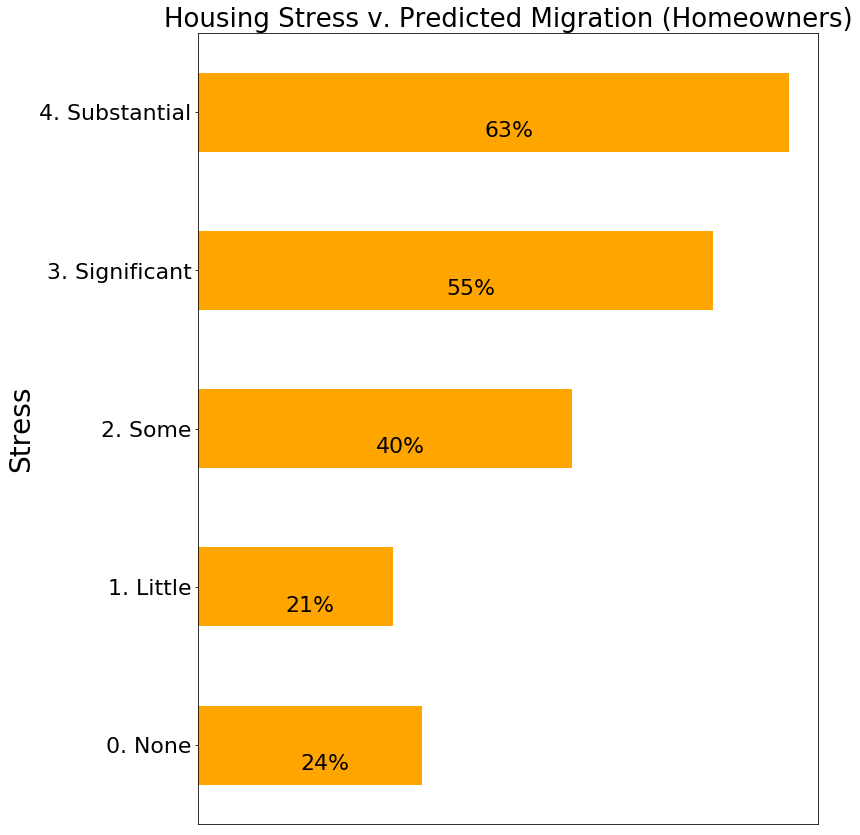

In [544]:
# for presentation
dfc = plotdf.loc[(plotdf['RelocationBand'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'),
                 ['RelocationBand', 'StressCode', 'StressCodeDescriptive']]
dfp = pd.pivot_table(dfc, values='StressCode',
                     index='StressCodeDescriptive', columns='RelocationBand', aggfunc='count')
dfp.sort_index(inplace=True)

###

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
dfp_pct = dfp_pct['Likely']

ax = dfp_pct.plot.barh(stacked=True,  fontsize=22, color='orange', figsize=(12,12))  # df.plot.bar(title="Scores")
plot_title('Housing Stress v. Predicted Migration (Homeowners)', fontsize=26, prefix='')
#ylabel_range_annotation(ax, False)
ax.set_ylabel('Stress', fontsize=28)
ax.set_xlabel('')
ax.set_xticks([])
label_fontsize = 16
label_horiz_adj = label_fontsize * 2.0 / 3.0

annotate_patches_float(True, ax.patches, precision=0)
save_figure('owner_highstress_migration_percent.png')
    

annotating patches float
RelocationBand         Likely  Neutral  Unlikely
StressCodeDescriptive                           
0. None                   3.0      2.0       NaN
1. Little                 3.0      7.0       NaN
2. Some                  10.0      8.0       8.0
3. Significant           26.0      8.0       7.0
4. Substantial            7.0      3.0       5.0
Saving figure E:\LexingtonSurvey\charts\relationships\renter_stress_migration_percent.png


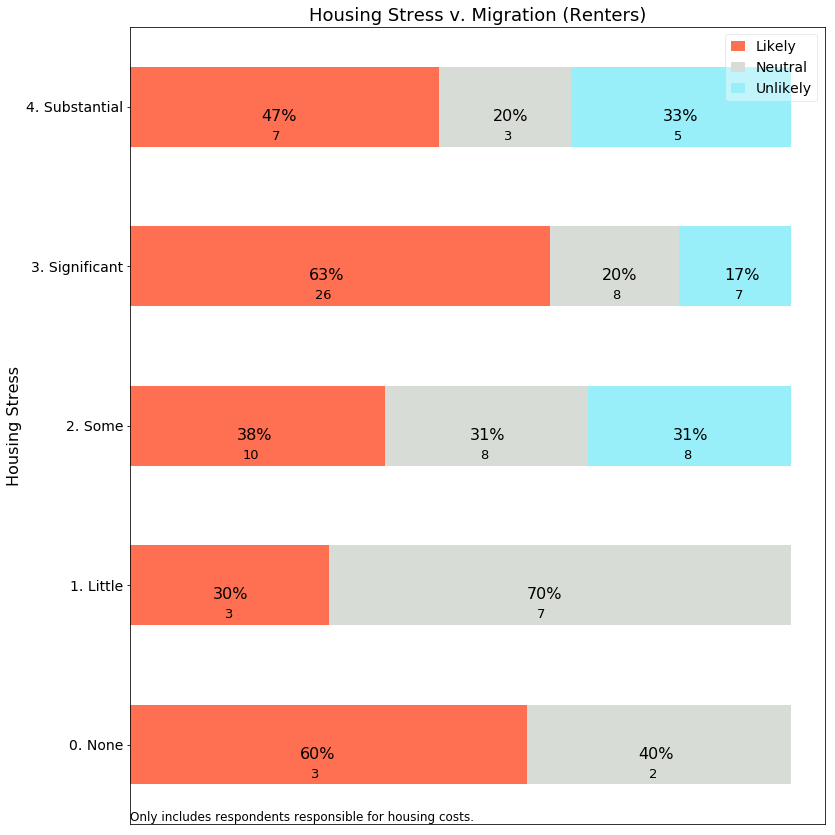

In [545]:
dfc = plotdf.loc[(plotdf['RelocationBand'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Rent'),
                 ['RelocationBand', 'StressCode', 'StressCodeDescriptive']]
dfp = pd.pivot_table(dfc, values='StressCode',
                     index='StressCodeDescriptive', columns='RelocationBand', aggfunc='count')

dfp.sort_index(inplace=True)

###

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Housing Stress v. Migration (Renters)', 'Housing Stress', 'upper right', migration_colors,
                        ylabel_dollar_prefix=False, do_ylabel_range_annotation=False)
save_figure('renter_stress_migration_percent.png')


annotating patches float
StressBand                 2. High Stress  1. Medium Stress  0. Low Stress
Tenure                                                                    
moved in 1979 and earlier              41                52            121
moved in 1980-1989                     22                26             66
moved in 1990-1999                     32                71             96
moved in 2000-2009                     41                95            139
moved in 2010-2014                     51               102            106
moved in 2015 or later                 34                56             50
Saving figure E:\LexingtonSurvey\charts\relationships\Own_Tenure_stress_percent.png


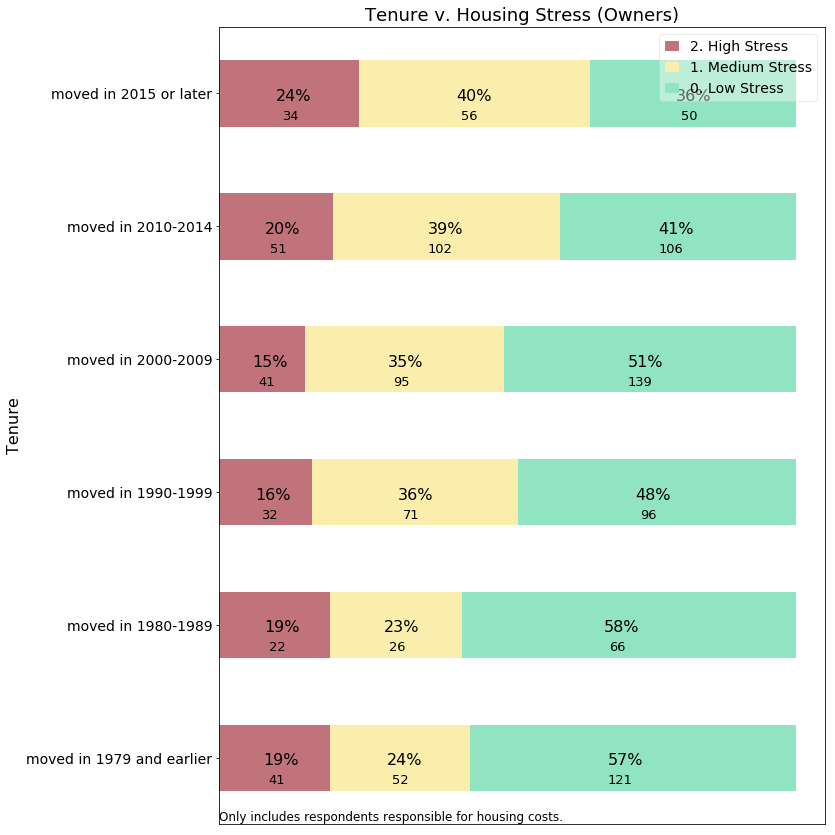

annotating patches float
StressBand                 2. High Stress  1. Medium Stress  0. Low Stress
Tenure                                                                    
moved in 1979 and earlier             3.0               NaN            1.0
moved in 1980-1989                    1.0               2.0            1.0
moved in 1990-1999                    4.0               1.0            1.0
moved in 2000-2009                   11.0               7.0            2.0
moved in 2010-2014                   13.0               5.0            3.0
moved in 2015 or later               25.0              10.0            7.0
Saving figure E:\LexingtonSurvey\charts\relationships\Rent_Tenure_stress_percent.png


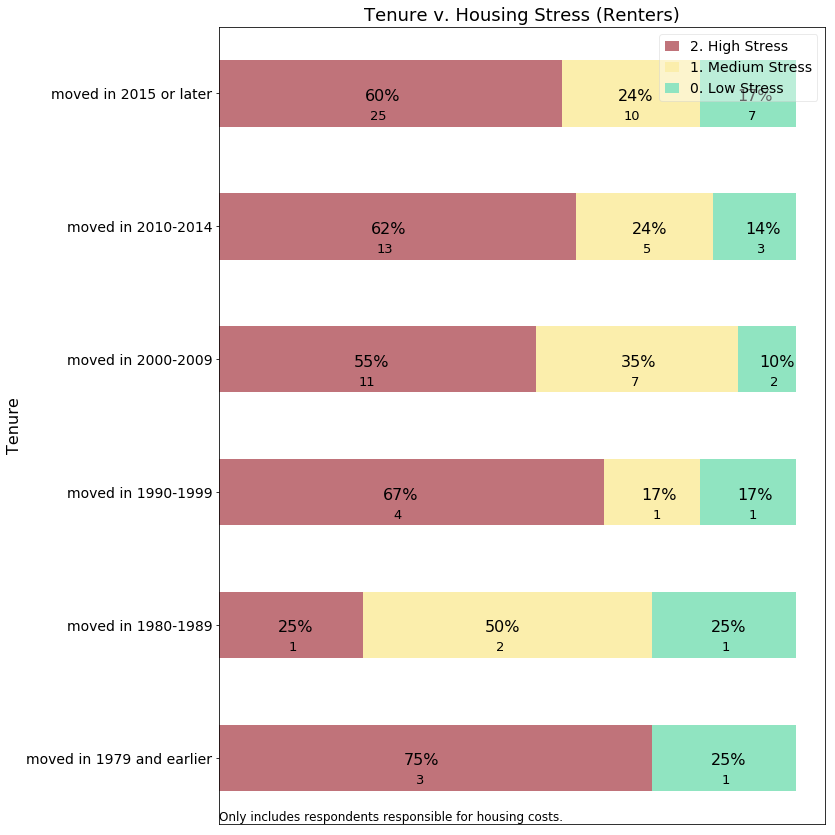

In [556]:
# Age v. Housing Stress - Renters and Owners, Both Age Code Sets
for housing_status in [['Own', 'Owners'], ['Rent', 'Renters']]:
    ownrent_filter, ownrent_descriptor = housing_status
    ac = 'Tenure'
    dfc = plotdf.loc[(plotdf[ac] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']==ownrent_filter),
                     [ac, 'StressCode', 'StressBand']]
    dfp = pd.pivot_table(dfc, values='StressCode',
                         index=ac, columns='StressBand', aggfunc='count')
    dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]
    dfp.sort_index(inplace=True)
    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    dfp_pct.sort_index(inplace=True)
    barh_stacked_number_pct(dfp, 'Tenure v. Housing Stress (%s)' % ownrent_descriptor, 
                            'Tenure', 'upper right', stress_colors,  ylabel_dollar_prefix=False,
                       do_ylabel_range_annotation=False)
    save_figure('%s_%s_stress_percent.png' % (ownrent_filter, ac))

annotating patches float
StressBand  2. High Stress  1. Medium Stress  0. Low Stress
AgeCode1                                                   
0                       20                51             33
40                      63               127            158
50                      62                98            136
60                      30                59            116
70                      42                63            135
Saving figure E:\LexingtonSurvey\charts\relationships\Own_AgeCode1_stress_percent.png


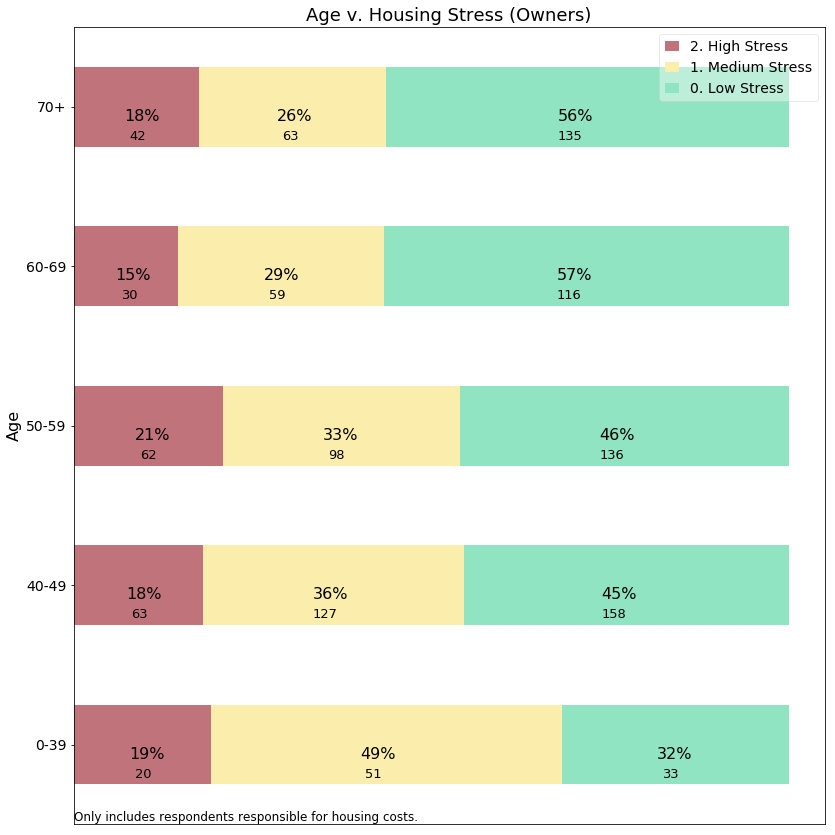

annotating patches float
StressBand  2. High Stress  1. Medium Stress  0. Low Stress
AgeCode1                                                   
0                       13                 3              5
40                      17                 8              5
50                      15                 4              3
60                       3                 2              1
70                       8                 8              2
Saving figure E:\LexingtonSurvey\charts\relationships\Rent_AgeCode1_stress_percent.png


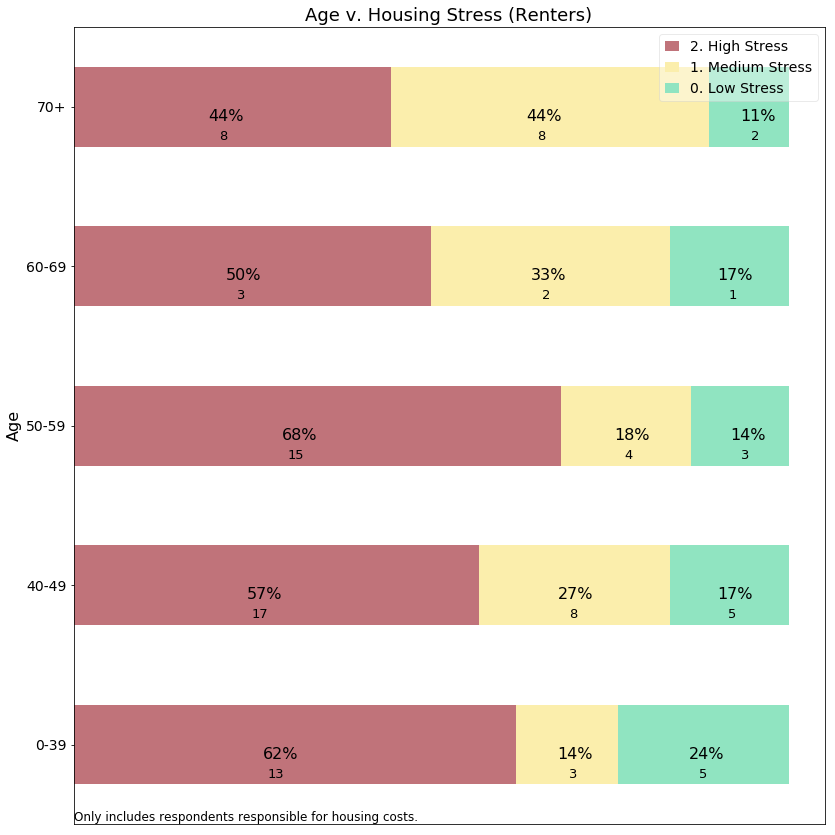

annotating patches float
StressBand  2. High Stress  1. Medium Stress  0. Low Stress
AgeCode                                                    
0                        1                 1              2
30                      19                50             31
40                      63               127            158
50                      62                98            136
60                      30                59            116
70                      28                44             97
80                      14                19             38
Saving figure E:\LexingtonSurvey\charts\relationships\Own_AgeCode_stress_percent.png


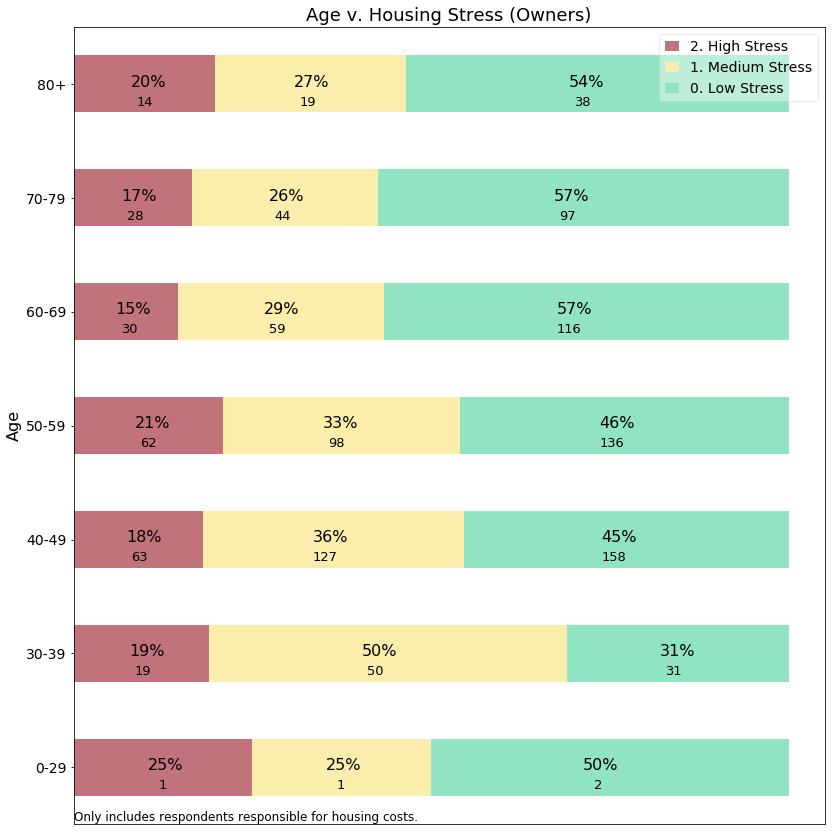

annotating patches float
StressBand  2. High Stress  1. Medium Stress  0. Low Stress
AgeCode                                                    
0                      1.0               NaN            1.0
30                    12.0               3.0            4.0
40                    17.0               8.0            5.0
50                    15.0               4.0            3.0
60                     3.0               2.0            1.0
70                     6.0               2.0            1.0
80                     2.0               6.0            1.0
Saving figure E:\LexingtonSurvey\charts\relationships\Rent_AgeCode_stress_percent.png


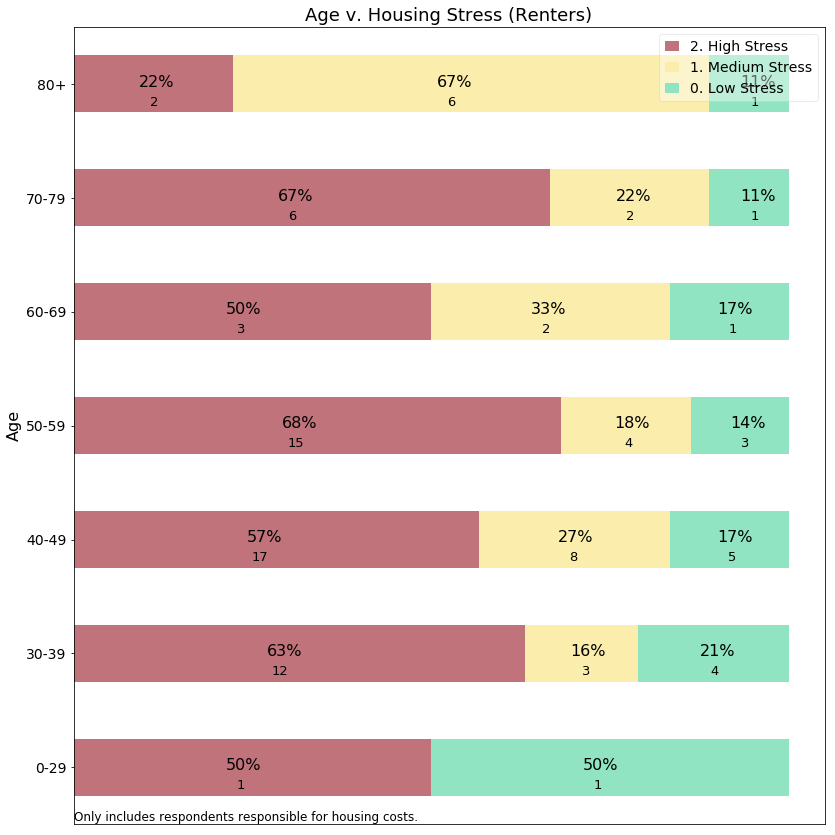

In [530]:
# Age v. Housing Stress - Renters and Owners, Both Age Code Sets
for ac in ['AgeCode1', 'AgeCode']:
    for housing_status in [['Own', 'Owners'], ['Rent', 'Renters']]:
        ownrent_filter, ownrent_descriptor = housing_status

        dfc = plotdf.loc[(plotdf[ac] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']==ownrent_filter),
                         [ac, 'StressCode', 'StressBand']]
        dfp = pd.pivot_table(dfc, values='StressCode',
                             index=ac, columns='StressBand', aggfunc='count')
        dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]
        dfp.sort_index(inplace=True)
        dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
        dfp_pct.sort_index(inplace=True)
        barh_stacked_number_pct(dfp, 'Age v. Housing Stress (%s)' % ownrent_descriptor, 
                                'Age', 'upper right', stress_colors, ylabel_dollar_prefix=False)
        save_figure('%s_%s_stress_percent.png' % (ownrent_filter, ac))

calling annotate patches
is stacked
Saving figure E:\LexingtonSurvey\charts\relationships\Own_age_highstress_percent.png


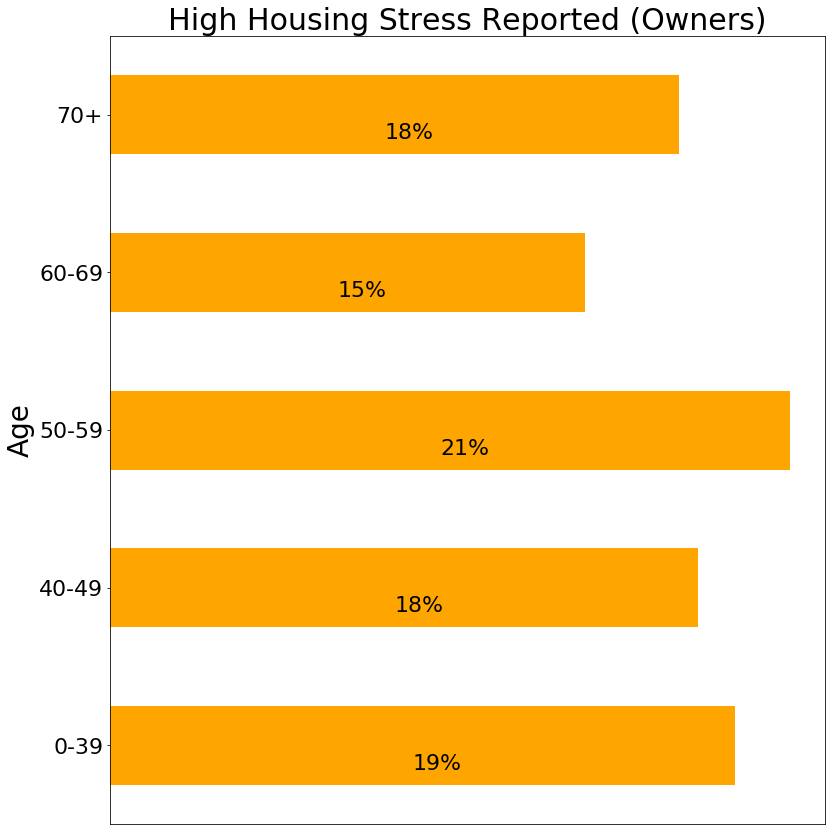

In [531]:
for housing_status in [['Own', 'Owners']]:
    ownrent_filter, ownrent_descriptor = housing_status

    dfc = plotdf.loc[(plotdf['AgeCode1'] >=0) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']==ownrent_filter),
                     ['AgeCode1', 'StressCode', 'StressBand']]
    dfp = pd.pivot_table(dfc, values='StressCode',
                         index='AgeCode1', columns='StressBand', aggfunc='count')
    dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

    dfp.sort_index(inplace=True)

    ###

    dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
    dfp_pct.sort_index(inplace=True)
    dfp_pct = dfp_pct['2. High Stress']
    ax = dfp_pct.plot.barh(stacked=True,  fontsize=22, color='orange', figsize=(12,12))  # df.plot.bar(title="Scores")
    plot_title('High Housing Stress Reported (Owners)', fontsize=30, prefix='')
    ylabel_range_annotation(ax, False)
    ax.set_ylabel('Age', fontsize=28)
    ax.set_xlabel('')
    ax.set_xticks([])
    label_fontsize = 16
    label_horiz_adj = label_fontsize * 2.0 / 3.0

    annotate_patches_float(True, ax.patches, precision=0)
    save_figure('%s_age_highstress_percent.png' % ownrent_filter)


In [ ]:
# stress v. income & age
# attempt to do two variables

#'$100,000-$149,999':100000,
#'$150,000-$199,999':150000,
#'$200,000 and over':200000,
#'$35,000-$49,999':0,
#'$50,000-$74,999':50000,
#'$75,000-$99,000':75000,
#'Less than $35,000':0,

# not enough cases so use IncomeCode2
#        '$100,000-$149,999':100000,
#'$150,000-$199,999':100000,
#'$200,000 and over':200000,
#'$35,000-$49,999':0,
#'$50,000-$74,999':0,
#'$75,000-$99,000':0,
#'Less than $35,000':0,

# not enough data to break out this way for renters        
for housing_status in [['Own', 'Owners']]:
    for income_code, income_desc in [
        [0, 'Less than \$99,999'],
        [100000, '\$100,000-\$199,999'],
        [200000, '\$200,000 and over']]:
        
    
        ownrent_filter, ownrent_descriptor = housing_status

        dfc = plotdf.loc[(plotdf['AgeCode1'] >=0) & (plotdf['StressCode']>=0) & (plotdf['IncomeCode2']==income_code) & (plotdf['OwnRent']==ownrent_filter),
                         ['AgeCode1', 'StressCode', 'StressBand']]
        dfp = pd.pivot_table(dfc, values='StressCode',
                             index='AgeCode1', columns='StressBand', aggfunc='count')
        dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

        dfp.sort_index(inplace=True)

        ###

        dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
        dfp_pct.sort_index(inplace=True)
        ax = dfp_pct.plot.barh(stacked=True,  fontsize=22, figsize=(12,12))  # df.plot.bar(title="Scores")
        plot_title('Income Range %s: Age v. Stress (%s)' % (income_desc, ownrent_descriptor))
        ylabel_range_annotation(ax, False)
        ax.set_ylabel('Age', fontsize=20)
        ax.set_xlabel('')
        ax.set_xticks([])
        label_fontsize = 16
        label_horiz_adj = label_fontsize * 2.0 / 3.0

        annotate_patches_float(True, ax.patches)
        legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
        ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
                verticalalignment='bottom', size='large', transform=ax.transAxes)
        save_figure('%s_income_%d_age_stress_percent.png' % (ownrent_filter, income_code))

        ###

        ax = dfp.plot.barh(stacked=False, fontsize=20, figsize=(12,12))
        plot_title('Income Range %s: Age v. Stress (%s)' % (income_desc, ownrent_descriptor))
        ylabel_range_annotation(ax, False)
        ax.set_ylabel('Age', fontsize=20)
        ax.set_xlabel('Response Count', fontsize=20)
        legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
        annotate_patches_integer(False, ax.patches)
        ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
                verticalalignment='bottom', size='large', transform=ax.transAxes)
        save_figure('%s_income_%d_age_stress_response.png' % (ownrent_filter, income_code))

annotating patches float
StressBand         2. High Stress  1. Medium Stress  0. Low Stress
MeansTestedApprox                                                 
0                             191               383            562
1                              30                20             22
Saving figure E:\LexingtonSurvey\charts\relationships\means_tested_stress_percent.png


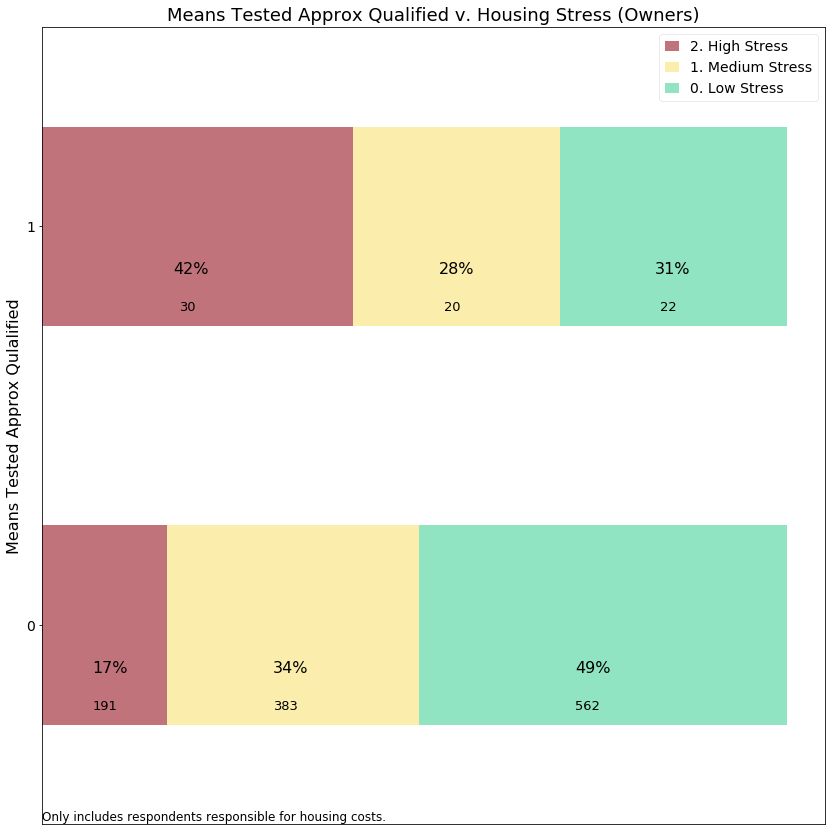

In [554]:
dfc = plotdf.loc[(plotdf['MeansTestedApprox'] != -1) & (plotdf['StressCode']>=0) & (plotdf['OwnRent']=='Own'),
                 ['MeansTestedApprox', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='MeansTestedApprox', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

dfp.sort_index(inplace=True)

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Means Tested Approx Qualified v. Housing Stress (Owners)', 
                        'Means Tested Approx Qulalified', 'upper right', stress_colors, ylabel_dollar_prefix=False,
                       do_ylabel_range_annotation=False)
save_figure('means_tested_stress_percent.png')    


annotating patches float
RelocationBand     Likely  Neutral  Unlikely
MeansTestedApprox                           
0                     398      395       365
1                      23       29        21
Saving figure E:\LexingtonSurvey\charts\relationships\means_tested_own_migration_percent.png


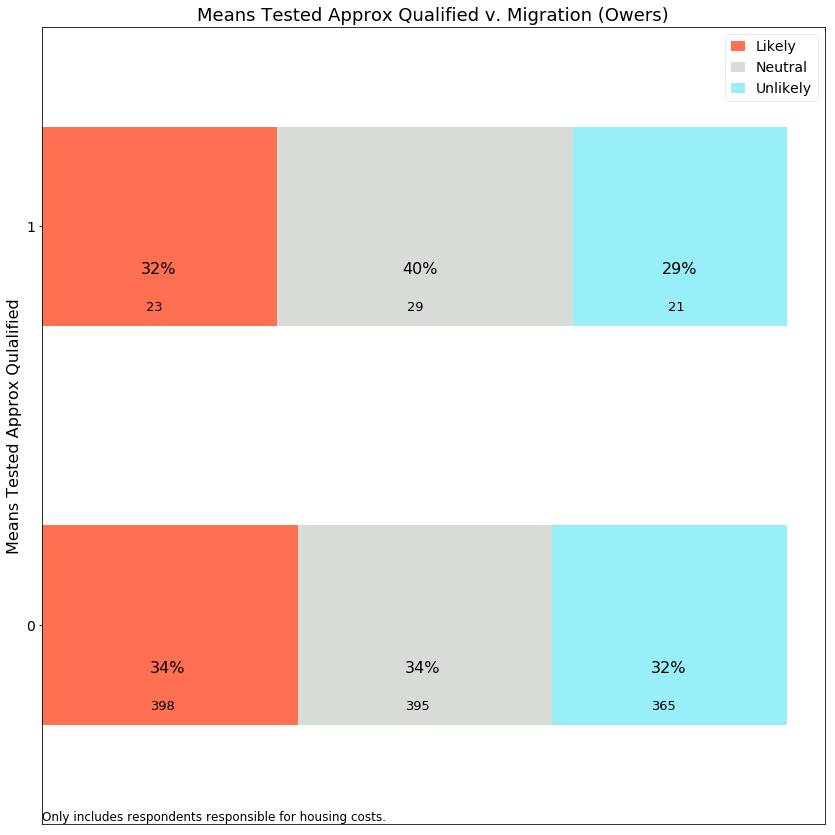

In [553]:
dfc = plotdf.loc[(plotdf['MeansTestedApprox'] != -1) & (plotdf['RelocationCode']>=0) & (plotdf['OwnRent']=='Own'),
                 ['MeansTestedApprox', 'RelocationCode', 'RelocationBand']]
dfp = pd.pivot_table(dfc, 
                     values='RelocationCode',
                     index='MeansTestedApprox', columns='RelocationBand', aggfunc='count')

dfp.sort_index(inplace=True)

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
barh_stacked_number_pct(dfp, 'Means Tested Approx Qualified v. Migration (Owers)', 
                        'Means Tested Approx Qulalified', 'upper right', migration_colors, ylabel_dollar_prefix=False,
                       do_ylabel_range_annotation=False)
save_figure('means_tested_own_migration_percent.png')    

calling annotate patches
is stacked
Saving figure E:\LexingtonSurvey\charts\relationships\means_tested_highstress_percent.png


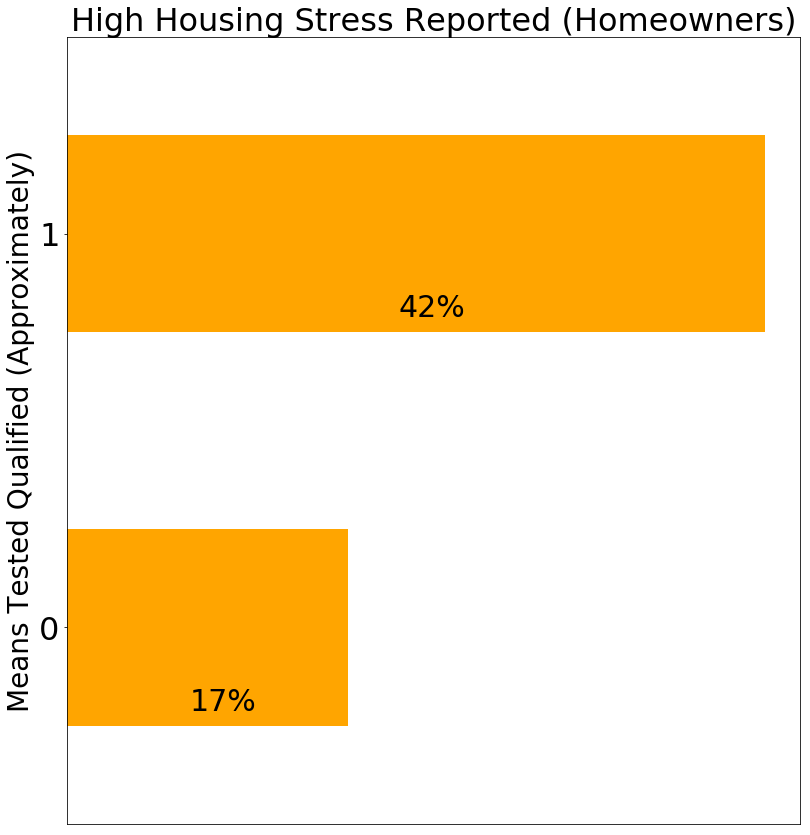

In [532]:
dfc = plotdf.loc[(plotdf['MeansTestedApprox'] != -1) & (plotdf['StressCode']>=0),
                 ['MeansTestedApprox', 'StressCode', 'StressBand']]
dfp = pd.pivot_table(dfc, 
                     values='StressCode',
                     index='MeansTestedApprox', columns='StressBand', aggfunc='count')
dfp=dfp[['2. High Stress', '1. Medium Stress', '0. Low Stress']]

dfp.sort_index(inplace=True)

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
dfp_pct = dfp_pct['2. High Stress']
ax = dfp_pct.plot.barh(stacked=True,  fontsize=32, color='orange', figsize=(12,12))  # df.plot.bar(title="Scores")
plot_title('High Housing Stress Reported (Homeowners)',fontsize=32, prefix='')

ax.set_ylabel('Means Tested Qualified (Approximately)', fontsize=28)
ax.set_xlabel('')
ax.set_xticks([])
label_fontsize = 22
label_horiz_adj = label_fontsize * 2.0 / 3.0
#legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
annotate_patches_float(True, ax.patches, precision=0, label_fontsize=30)
save_figure('means_tested_highstress_percent.png')    


In [ ]:
# means-tested v. current use of LPS
print plotdf.ResponsibleCode.value_counts()

dfc = plotdf.loc[(plotdf['MeansTestedApprox'] != -1) & (plotdf['ActivityLPS']>=0),
                 ['MeansTestedApprox', 'ResponsibleCode', 'ActivityLPS']]

print dfc

dfp = pd.pivot_table(dfc, 
                     values='ResponsibleCode',
                     index='MeansTestedApprox', columns='ActivityLPS', aggfunc='count')

print dfp

dfp=dfp[['Yes', 'No']]

dfp.sort_index(inplace=True)

##

dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
ax = dfp_pct.plot.barh(stacked=True,  fontsize=22, figsize=(12,12))  # df.plot.bar(title="Scores")
plot_title('Means Tested Approx Qualified v. Activity LPS (response %)')
ax.set_ylabel('Means Tested Approx Qualified', fontsize=20)
ax.set_xlabel('')
ax.set_xticks([])
label_fontsize = 16
label_horiz_adj = label_fontsize * 2.0 / 3.0
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
annotate_patches_float(True, ax.patches)
ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
        verticalalignment='bottom', size='large', transform=ax.transAxes)
    
    
#plt.text(0, 1, 'Only includes respondents responsible for housing costs.', ha='left', wrap=True)
save_figure('means_tested_activity_lps_percent.png')    

###

ax = dfp.plot.barh(stacked=False, fontsize=20, figsize=(12,12))
plot_title('Means Tested Approx Qualified  v. Activity LPS (response counts)')
ax.set_ylabel('Means Tested Approx Qualified', fontsize=20)
ax.set_xlabel('Response Count', fontsize=20)

legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
annotate_patches_integer(False, ax.patches)
ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
        verticalalignment='bottom', size='large', transform=ax.transAxes)

save_figure('means_tested_activity_lps_response.png')

In [ ]:
dfc = plotdf.loc[(plotdf['MeansTestedApprox'] != -1) & (plotdf['ActivityLPS']>=0),
                 ['MeansTestedApprox', 'ResponsibleCode', 'ActivityLPS']]
dfp = pd.pivot_table(dfc, 
                     values='ResponsibleCode',
                     index='MeansTestedApprox', columns='ActivityLPS', aggfunc='count')

dfp=dfp[['Yes', 'No']]
dfp.sort_index(inplace=True)
dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
dfp_pct.sort_index(inplace=True)
dfp_pct = dfp_pct['Yes']

ax = dfp_pct.plot.barh(stacked=True,  fontsize=22, color='orange', figsize=(12,12))  # df.plot.bar(title="Scores")
plot_title('Current Use of Lexington Public Schools (Homeowners)', fontsize=28, prefix='')
ax.set_ylabel('Means Tested Qualified (Approximately)', fontsize=24)
ax.set_xlabel('')
ax.set_xticks([])
label_fontsize = 16
label_horiz_adj = label_fontsize * 2.0 / 3.0
annotate_patches_float(True, ax.patches, precision=0, label_fontsize=30)
    
    
#plt.text(0, 1, 'Only includes respondents responsible for housing costs.', ha='left', wrap=True)
save_figure('means_tested_activity_lpsuse_percent.png')    

In [ ]:
MAX_CHARTS = 100
for cntr, activity_field in enumerate(activity_list):
    
    if cntr >= MAX_CHARTS:
        break
    
    for housing_status in [['Own', 'Owners'], ['Rent', 'Renters']]:
        ownrent_filter, ownrent_descriptor = housing_status
    

        dfc = plotdf.loc[(plotdf[activity_field] != -1) & (plotdf['RelocationBand']>=0) & (plotdf['OwnRent'] == ownrent_filter),
                         [activity_field, 'RelocationBand', 'RelocationCode']]
        dfp = pd.pivot_table(dfc, 
                             values='RelocationCode',
                             index=activity_field, columns='RelocationBand', aggfunc='count')
        dfp.sort_index(inplace=True)

        ##

        dfp_pct = dfp.iloc[:,:].apply(lambda y: y/y.sum(), axis=1)
        dfp_pct.sort_index(inplace=True)
        ax = dfp_pct.plot.barh(stacked=True,  fontsize=22, figsize=(12,12))  # df.plot.bar(title="Scores")
        plot_title('%s v. Migration (%s)' % (activity_field, ownrent_descriptor))
#        handles, labels = ax.get_legend_handles_labels()
        
        legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

        ax.set_ylabel(activity_field, fontsize=20)
        ax.set_xlabel('')
        ax.set_xticks([])
        label_fontsize = 16
        label_horiz_adj = label_fontsize * 2.0 / 3.0
        annotate_patches_float(True, ax.patches)
        ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
                verticalalignment='bottom', size='large', transform=ax.transAxes)
        save_figure('%s_%s_migration_percent.png' % (ownrent_filter, activity_field))

        #

        # Horizontal bar chart
        ax = dfp.plot.barh(stacked=False, fontsize=20, figsize=(12,12))
        plot_title('%s v. Migration (%s)' % (activity_field, ownrent_descriptor))
        ax.set_ylabel(activity_field, fontsize=20)
        ax.set_xlabel('Response Count', fontsize=20)
        legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
        annotate_patches_integer(False, ax.patches)
        ax.text(0, 0, 'Only includes respondents responsible for housing costs.', horizontalalignment='left',
                verticalalignment='bottom', size='large', transform=ax.transAxes)
        save_figure('%s_%s_migration_response.png'% (ownrent_filter, activity_field))
    

In [ ]:
import glob
from fpdf import FPDF


#chart_dir = 'E:\\LexingtonSurvey\\charts\\relationships'
#freq_chart_dir = 'E:\\LexingtonSurvey\\charts\\frequencies'
file_list1 = glob.glob(os.path.join(freq_chart_dir, '*.png'))
print file_list1
                      
file_list2 = glob.glob(os.path.join(chart_dir, '*.png'))
print file_list2
imagelist = file_list2 + file_list1

pdf = FPDF()
pdf.set_font('Arial', '', 14)
pdf.add_page()
pdf.cell(w = 140, h = 20, txt = 'Lexington Survey.  Preliminary Result Packet')
pdf.set_font('Arial', '', 8)
pdf.ln(8)
pdf.cell(w = 140, h = 20, txt = 'Page. Chart Name')
pdf.ln(5)
# print list of images
for cntr, image in enumerate(imagelist):
    page_num = int(cntr / 4) + 3
    
    image_name = image[:-4]
    image_name = image_name[::-1]
    image_name = image_name[:image_name.find('\\')]
    image_name = image_name[::-1]
    pdf.cell(w = 140, h = 16, txt = '%d.  %s' % (page_num, image_name))
    pdf.ln(3)
    print '+',

for cntr, image in enumerate(imagelist):
    if cntr >= 3000:
        break
    if cntr % 4 == 0:
        pdf.add_page()
        page_num = int(cntr / 4) + 3
        pdf.cell(w = 140, h = 20, txt = 'Page %d' % page_num)
    x, y, w, h = (cntr%2)*105+5, ((cntr/2)%2) * 140 + 30, 100, 120
    pdf.image(image,x,y,w,h)
    print '.',
pdf.output('E:\\LexingtonSurvey\\charts\\chart_summary.pdf', "F")
print 'done'

In [ ]:
# What Does the Survey Tell Us?
import re
filename = 'E:\\LexingtonSurvey\\whatdoesthesurveytellus.txt'
#chart_dir = 'E:\\LexingtonSurvey\\charts\\relationships'


pattern = '\[.*\]' 
prog = re.compile(pattern, re.DOTALL | re.UNICODE)

        
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', '', 16)
pdf.cell(w = 140, h = 20, txt = 'What Does the Survey Tell Us?')
pdf.ln(6)
pdf.cell(w = 140, h = 20, txt = 'Preliminary Discussion (11/8/2018)')
pdf.ln(14)
pdf.set_font('Arial', '', 10)

with open(filename, 'r') as fh:
    while True:
        report_txt = fh.readline()
        if report_txt == '':
            break
        m = prog.match(report_txt)
        if m:
            report_txt = 'image: %s' % m.group(0)
            print report_txt
            img_filename = os.path.join(chart_dir, m.group(0)[1:-1])
            width, height = 90, 110
            pdf.image(img_filename, w=width, h=height)
            #pdf.cell( 40, 40, pdf.InlineImage(img_filename, pdf.GetX(), pdf.GetY(), 100), 0, 0, 'L', false );
        else:
            pdf.multi_cell(w = 180, h = 4, txt = report_txt)

        pdf.ln(6)   

pdf.output('E:\\LexingtonSurvey\\WhatDoesTheSurveyTellUs.pdf', "F")

print 'done'




<HR><HR><HR><HR><HR><HR><HR>

In [ ]:
raise 'stop here'

In [ ]:

ax = dfc['IncomeCode'].value_counts().plot(kind='barh', figsize=(10,7),
                                                 color="slateblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Income Code Distribution", fontsize=22)
ax.set_xlabel("Frequency", fontsize=18);
#ax.set_xticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()
plt.show()

In [ ]:
print dfp[2].value_counts()

ax = dfp[2].value_counts().plot(kind='barh', figsize=(10,7),
                                                 color="slateblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Income Code Distribution", fontsize=22)
ax.set_xlabel("Frequency", fontsize=18);
#ax.set_xticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()
plt.show()

<H3>ROC Curve Testing</h3>


In [ ]:
def plot_roc(title, fpr, tpr):
    lw = 3
    plt.rcParams.update({'font.size': 20})
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12,12)

    ax = plt.gca()
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    # do not show so caller can annotate

<h3>Write ROC and Precision-Recall curves automatically</h3>

total tested 1208 with target field MarketValue filled in
Of these, 221 stressed
0. Low Stress       584
1. Medium Stress    403
2. High Stress      221
Name: StressBand, dtype: int64
$750,000-$999,999        398
$1,000,000-$1,249,999    294
$500,000-$749,999        177
$1,250,000-$1,499,999    127
$1,500,000-$1,749,999     84
$2,000,000 and more       55
$1,750,000-$1,999,999     45
Less than $500,000        28
Name: MarketValue, dtype: int64
sequence for MarketValue is ['Less than $500,000', '$500,000-$749,999', '$750,000-$999,999', '$1,000,000-$1,249,999', '$1,250,000-$1,499,999', '$1,500,000-$1,749,999', '$1,750,000-$1,999,999', '$2,000,000 and more']
cum sums [   0.   28.  205.  603.  897. 1024. 1108. 1153. 1208.]
cum recall [  0.   8.  54. 126. 177. 197. 209. 215. 221.]
false alarms [  0.  20. 151. 477. 720. 827. 899. 938. 987.]
fpr [0.         0.02026342 0.15298886 0.48328267 0.72948328 0.8378926
 0.91084093 0.95035461 1.        ]
recall is total_recall divided by stressed total

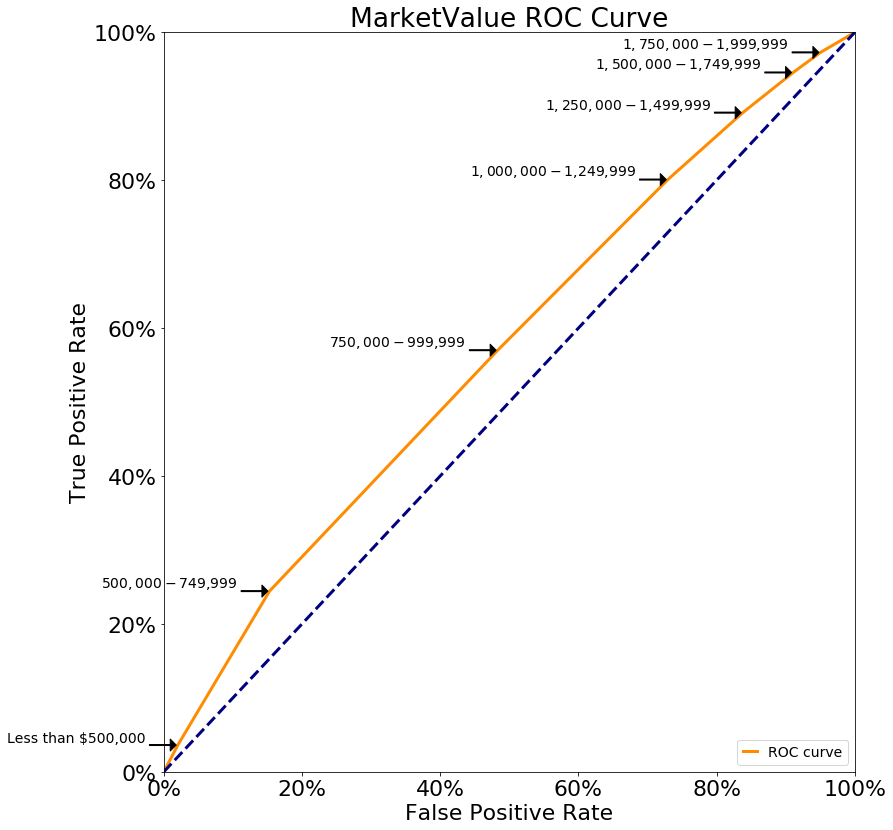

Saving figure E:\LexingtonSurvey\charts\relationships\MarketValue_precision_recall.png


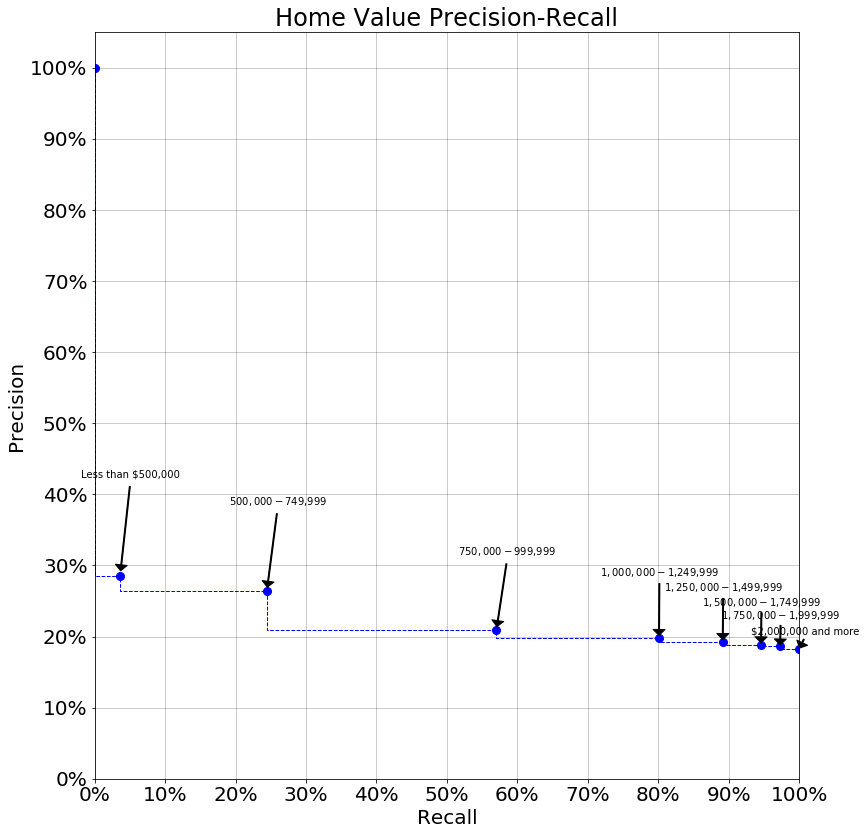

total tested 1201 with target field Tenure filled in
Of these, 221 stressed
0. Low Stress       578
1. Medium Stress    402
2. High Stress      221
Name: StressBand, dtype: int64
moved in 2000-2009           275
moved in 2010-2014           259
moved in 1979 and earlier    214
moved in 1990-1999           199
moved in 2015 or later       140
moved in 1980-1989           114
Name: Tenure, dtype: int64
sequence for Tenure is ['moved in 1979 and earlier', 'moved in 1980-1989', 'moved in 1990-1999', 'moved in 2000-2009', 'moved in 2010-2014', 'moved in 2015 or later']
cum sums [   0.  214.  328.  527.  802. 1061. 1201.]
cum recall [  0.  41.  63.  95. 136. 187. 221.]
false alarms [  0. 173. 265. 432. 666. 874. 980.]
fpr [0.         0.17653061 0.27040816 0.44081633 0.67959184 0.89183673
 1.        ]
recall is total_recall divided by stressed total
total_recall [  0.  41.  63.  95. 136. 187. 221.]
recall [0.         0.18552036 0.28506787 0.42986425 0.61538462 0.84615385
 1.        ]
Random G

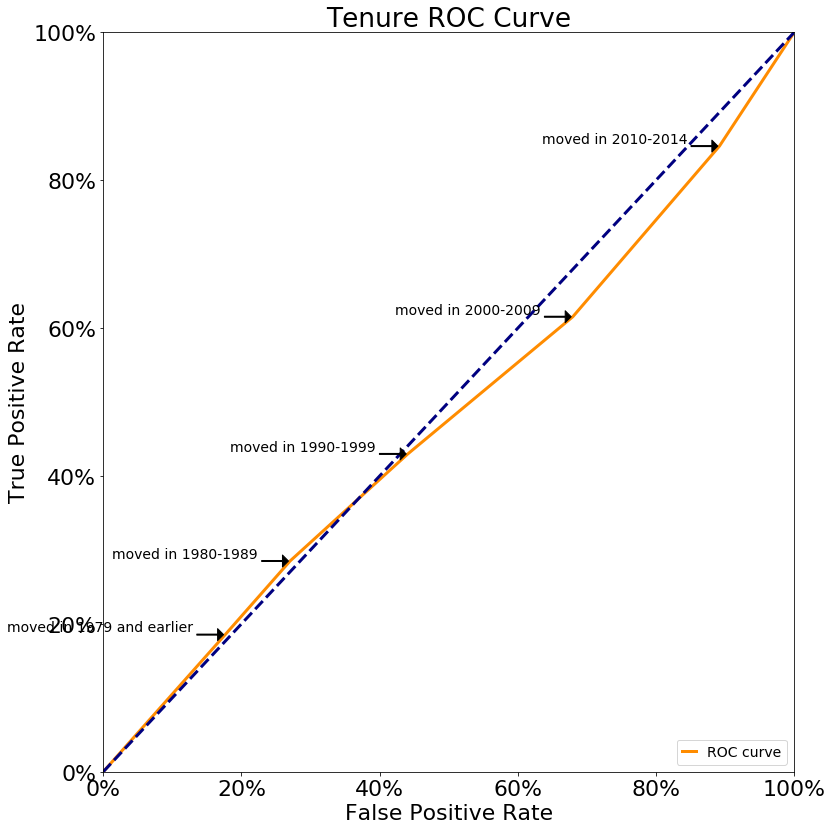

Saving figure E:\LexingtonSurvey\charts\relationships\Tenure_precision_recall.png


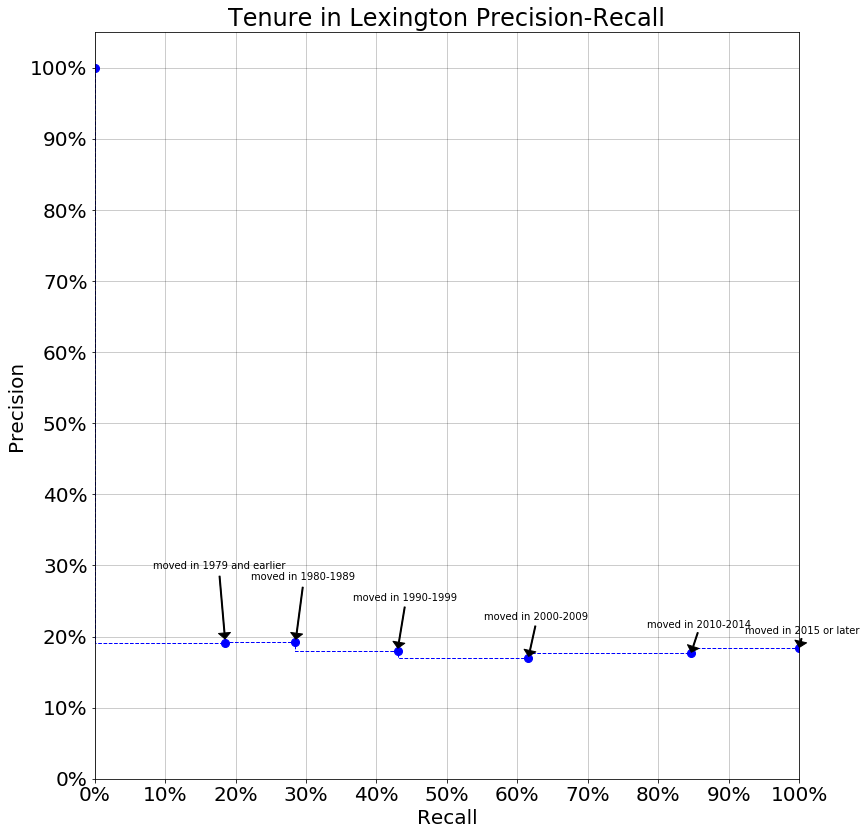

total tested 1193 with target field Age filled in
Of these, 217 stressed
0. Low Stress       578
1. Medium Stress    398
2. High Stress      217
Name: StressBand, dtype: int64
40-49 years          348
50-59 years          296
60-69 years          205
70-79 years          169
31-39 years          100
80 years and over     71
under 30 years         4
Name: Age, dtype: int64
sequence for Age is ['80 years and over', '70-79 years', '60-69 years', '50-59 years', '40-49 years', '31-39 years', 'under 30 years']
cum sums [   0.   71.  240.  445.  741. 1089. 1189. 1193.]
cum recall [  0.  14.  42.  72. 134. 197. 216. 217.]
false alarms [  0.  57. 198. 373. 607. 892. 973. 976.]
fpr [0.         0.05840164 0.20286885 0.38217213 0.62192623 0.91393443
 0.99692623 1.        ]
recall is total_recall divided by stressed total
total_recall [  0.  14.  42.  72. 134. 197. 216. 217.]
recall [0.         0.06451613 0.19354839 0.33179724 0.61751152 0.9078341
 0.99539171 1.        ]
Random Guessing:
217 are st

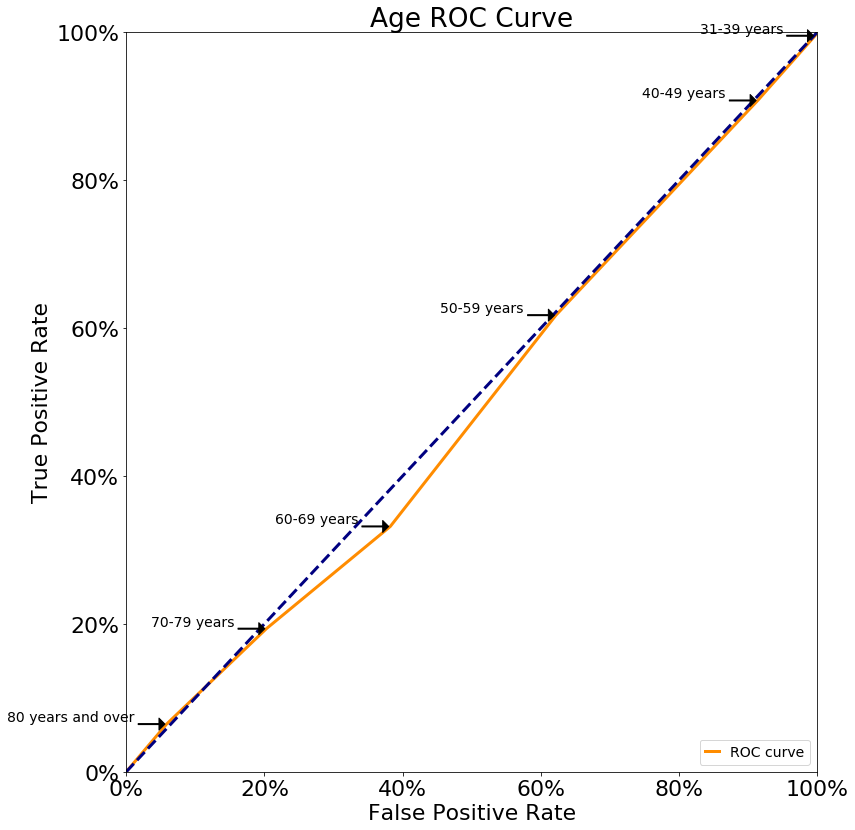

Saving figure E:\LexingtonSurvey\charts\relationships\Age_precision_recall.png


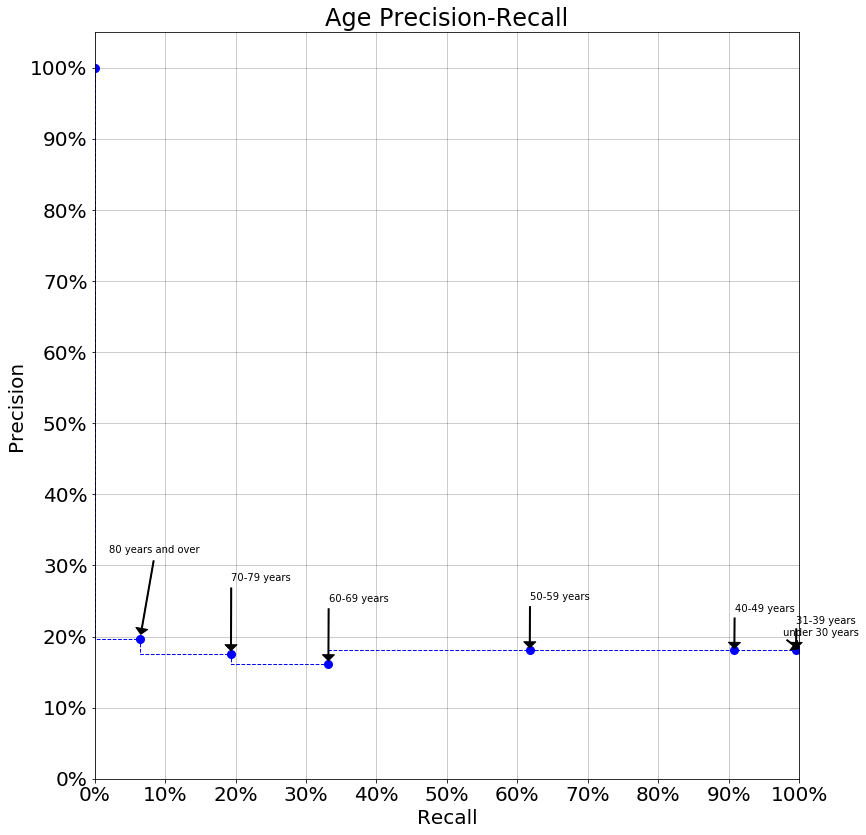

total tested 1043 with target field Income filled in
Of these, 195 stressed
0. Low Stress       492
1. Medium Stress    356
2. High Stress      195
Name: StressBand, dtype: int64
$200,000 and over    453
$100,000-$149,999    208
$150,000-$199,999    166
$75,000-$99,000       89
$50,000-$74,999       73
$35,000-$49,999       34
Less than $35,000     20
Name: Income, dtype: int64
sequence for Income is ['Less than $35,000', '$35,000-$49,999', '$50,000-$74,999', '$75,000-$99,000', '$100,000-$149,999', '$150,000-$199,999', '$200,000 and over']
cum sums [   0.   20.   54.  127.  216.  424.  590. 1043.]
cum recall [  0.  12.  28.  51.  75. 115. 147. 195.]
false alarms [  0.   8.  26.  76. 141. 309. 443. 848.]
fpr [0.         0.00943396 0.03066038 0.08962264 0.16627358 0.36438679
 0.52240566 1.        ]
recall is total_recall divided by stressed total
total_recall [  0.  12.  28.  51.  75. 115. 147. 195.]
recall [0.         0.06153846 0.14358974 0.26153846 0.38461538 0.58974359
 0.75384615 1.

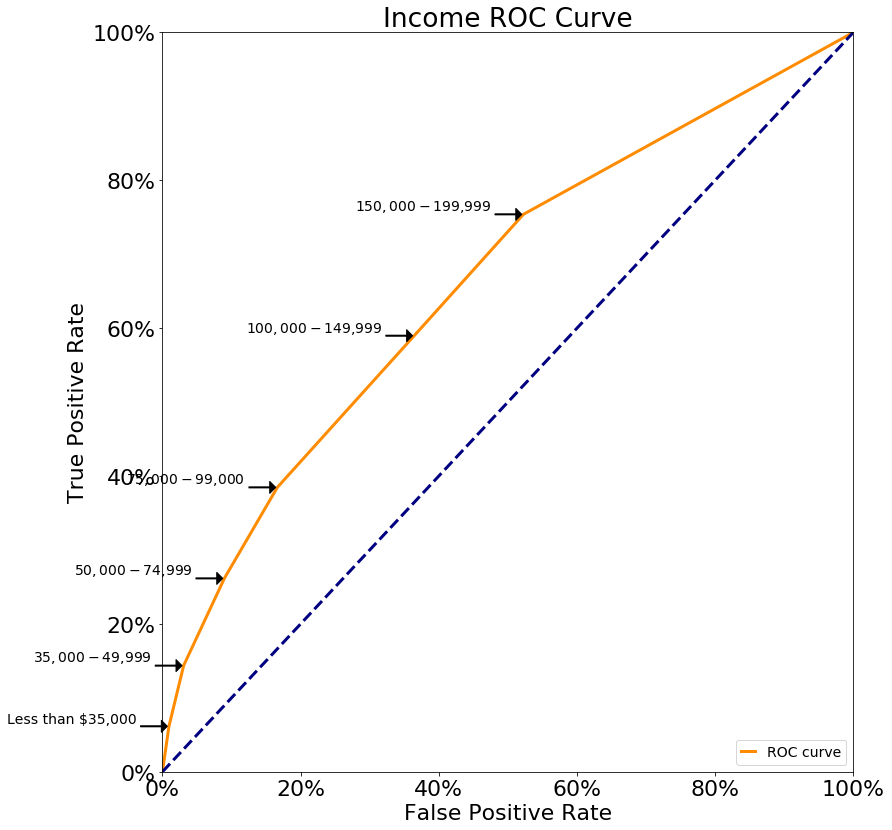

Saving figure E:\LexingtonSurvey\charts\relationships\Income_precision_recall.png


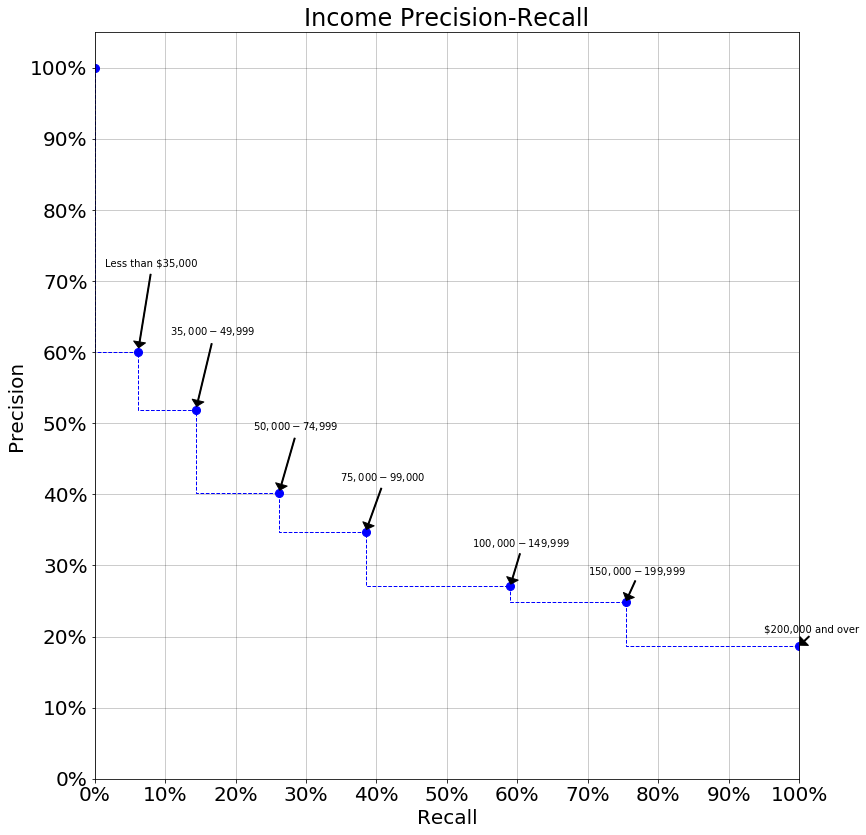

In [558]:
from sklearn.utils.fixes import signature
import matplotlib.ticker as mticker

def get_sequence(field_name):
    if field_name == 'Tenure':
        seq = ['moved in 2015 or later', 'moved in 2010-2014', 'moved in 2000-2009', 'moved in 1990-1999', 'moved in 1980-1989', 'moved in 1979 and earlier']
        seq.reverse()
    elif field_name == 'Age':
        seq = ['80 years and over', '70-79 years', '60-69 years', '50-59 years', '40-49 years', '31-39 years', 'under 30 years']
    elif field_name == 'HouseholdSize':
        seq = ['5+', '4', '3', '2', '1'].reverse()
    elif field_name == 'Income':
        seq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
              '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']
        seq.reverse()
    elif field_name == 'MarketValue':
        # repsonse too large for reasonable printing
            #df.rename(index = {"I don't live in a property owned by a family member" : 'Not owned by family'},
             #     inplace=True)
        seq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
              '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
              '$500,000-$749,999', 'Less than $500,000']
        seq.reverse()
    else:
        raise 'Unknown field name %s' % field_name
    return seq


def plot_stress_roc(owndf, field_name, title_name):
    # remove observations which are na for the target field
    owndf = owndf[owndf[field_name].isna() == False]

    total_tested = owndf.StressBand.count()
    print 'total tested %d with target field %s filled in' % (total_tested, field_name)
    stressed_total = owndf[owndf.StressBand=='2. High Stress'].StressBand.count()
    print 'Of these, %d stressed' % stressed_total
    print owndf.StressBand.value_counts()
    print owndf[field_name].value_counts()
    seq = get_sequence(field_name)
    print 'sequence for', field_name, 'is', seq
    total_sum = np.zeros(len(seq)+1)
    total_recall = np.zeros(len(seq)+1)
    total_precision = np.ones(len(seq)+1)

    sum_group = 0
    sum_recall = 0
    #print 'debugging array buildup'
    for cntr, i in enumerate(seq):
        #print i
        sum_group += owndf[owndf[field_name]==i][field_name].count()
        #print sum_group
        total_sum[cntr+1] = sum_group
        sum_recall += owndf[(owndf[field_name]==i) & (owndf.StressBand=='2. High Stress')][field_name].count()
        total_recall[cntr+1] = sum_recall
        #print sum_recall
        total_precision[cntr+1] = 1.0 * sum_recall / sum_group

    print 'cum sums', total_sum
    print 'cum recall', total_recall

    #print 'total tested', total_tested
    false_alarms = total_sum - total_recall
    print 'false alarms', false_alarms
    fpr = false_alarms * 1.0 / (total_tested-stressed_total)
    print 'fpr', fpr

    print 'recall is total_recall divided by stressed total'
    print 'total_recall', total_recall
    #print 'stressed_total', stressed_total
    tpr = total_recall * 1.0 / stressed_total
    print 'recall', tpr

    print 'Random Guessing:'
    print '%d are stressed out of %d, total %% is %2.1f' % (stressed_total, total_tested, 100.0*stressed_total/total_tested)


    plot_roc('%s ROC Curve' % field_name, fpr, tpr)
    ax = plt.gca()

    for cntr, i in enumerate(seq[:-1]):
        y = tpr[cntr+1]
        x = fpr[cntr+1]
        ax.annotate(i,
                    xy=(x,y), xycoords='data',
                    xytext=(-32,0), textcoords='offset points',
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headlength=6),
                    horizontalalignment='right', verticalalignment='bottom', fontsize=14)
    save_figure('%s_roc_curve.png' % field_name)
    
    
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    
    
    recall = tpr
    precision = total_precision
        
    plt.rcParams.update({'font.size': 20})
#    plt.scatter(recall[1:], precision[1:], color='b', marker='o')
    plt.step(recall, precision, color='b', lw=1,
             where='pre', linestyle='--', marker='o', markersize=8)
    #plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('%s Precision-Recall' % title_name)
    plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.2)
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12,12)
    # annotations
    ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MaxNLocator(11))
    ax.yaxis.set_major_locator(mticker.MaxNLocator(11))
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    
    
    for cntr, i in enumerate(seq):
        y = precision[cntr+1]
        x = recall[cntr+1]
        posn_base = len(i)
        ax.annotate(i,
                    xy=(x,y), xycoords='data',
                    xytext=(60,12*(len(seq)-cntr)), textcoords='offset points',
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headlength=6),
                    horizontalalignment='right', verticalalignment='bottom', fontsize=10)
    save_figure('%s_precision_recall.png' % field_name)

    
    


# - --------- use owndf only from here on ---------

owndf = plotdf[(plotdf['OwnRent']=='Own') & (owndf.StressBand.isna() == False)]

plot_stress_roc(owndf, 'MarketValue', 'Home Value')
plot_stress_roc(owndf, 'Tenure', 'Tenure in Lexington')
plot_stress_roc(owndf, 'Age', 'Age')
plot_stress_roc(owndf, 'Income', 'Income')